In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import spearmanr
import plotly.express as px
import networkx as nx
from sklearn.preprocessing import LabelEncoder
import numpy as np

#EDA

In [ ]:
import pandas as pd

# Define the file path
file_path_new = "/content/cybersecurity_attacks.csv"  # Update the path if needed

# ✅ Attempt to read the CSV with multiple safety options
try:
    df = pd.read_csv(
        file_path_new,
        delimiter=",",      # Change this if the separator is different (e.g., ";")
        encoding="utf-8",   # Ensure correct encoding
        quoting=3,          # Ignore quotation issues
        on_bad_lines="skip" # Skip problematic rows (replaces 'error_bad_lines=False' in Pandas 1.4+)
    )

    # ✅ Print basic info
    print("✅ CSV loaded successfully!")
    print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
    print("\n🔹 First 5 rows:")
    print(df.head())

except Exception as e:
    print(f"❌ Error loading CSV: {e}")


✅ CSV loaded successfully!
Shape: 17396 rows, 25 columns

🔹 First 5 rows:
                                           Timestamp Source IP Address  \
0                                2023-05-30 06:33:58     103.216.15.12   
1  Maiores possimus ipsum saepe vitae. Ad possimu...      IoC Detected   
2                                2020-08-26 07:08:30    78.199.217.198   
3  Illo animi mollitia vero voluptates error ad. ...      IoC Detected   
4                                2023-07-16 13:11:07     71.166.185.76   

  Destination IP Address Source Port Destination Port         Protocol  \
0           84.9.164.252       31225            17616             ICMP   
1                  28.67         NaN          Malware  Known Pattern B   
2         66.191.137.154       17245            48166             ICMP   
3                   51.5         NaN          Malware  Known Pattern A   
4        189.243.174.238        6131            26646              TCP   

  Packet Length Packet Type   Traffi

In [ ]:
# Info for dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21140 entries, 0 to 21139
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               21140 non-null  object 
 1   Source IP Address       21140 non-null  object 
 2   Destination IP Address  21140 non-null  object 
 3   Source Port             21140 non-null  int64  
 4   Destination Port        21140 non-null  int64  
 5   Protocol                21140 non-null  object 
 6   Packet Length           21140 non-null  int64  
 7   Packet Type             21140 non-null  object 
 8   Traffic Type            21140 non-null  object 
 9   Payload Data            21140 non-null  object 
 10  Malware Indicators      10557 non-null  object 
 11  Anomaly Scores          21140 non-null  float64
 12  Alerts/Warnings         10504 non-null  object 
 13  Attack Type             21140 non-null  object 
 14  Attack Signature        21140 non-null

Data Types:

3 columns of int64 (integer type),

1 column of float64 (floating-point type),

21 columns of object (categorical or text data).


In [ ]:
#Get a basic statistical overview of numerical columns
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,21140.000000,21140.000000,21140.000000,21140.000000
mean,33069.601419,33120.689830,780.774314,50.209079
std,18595.484831,18519.417229,417.112207,28.856569
min,1028.000000,1024.000000,64.000000,0.000000
25%,16886.250000,17177.500000,417.000000,25.330000
50%,33010.000000,32945.500000,785.000000,50.375000
75%,49176.000000,49101.250000,1140.000000,75.200000
max,65530.000000,65535.000000,1500.000000,100.000000


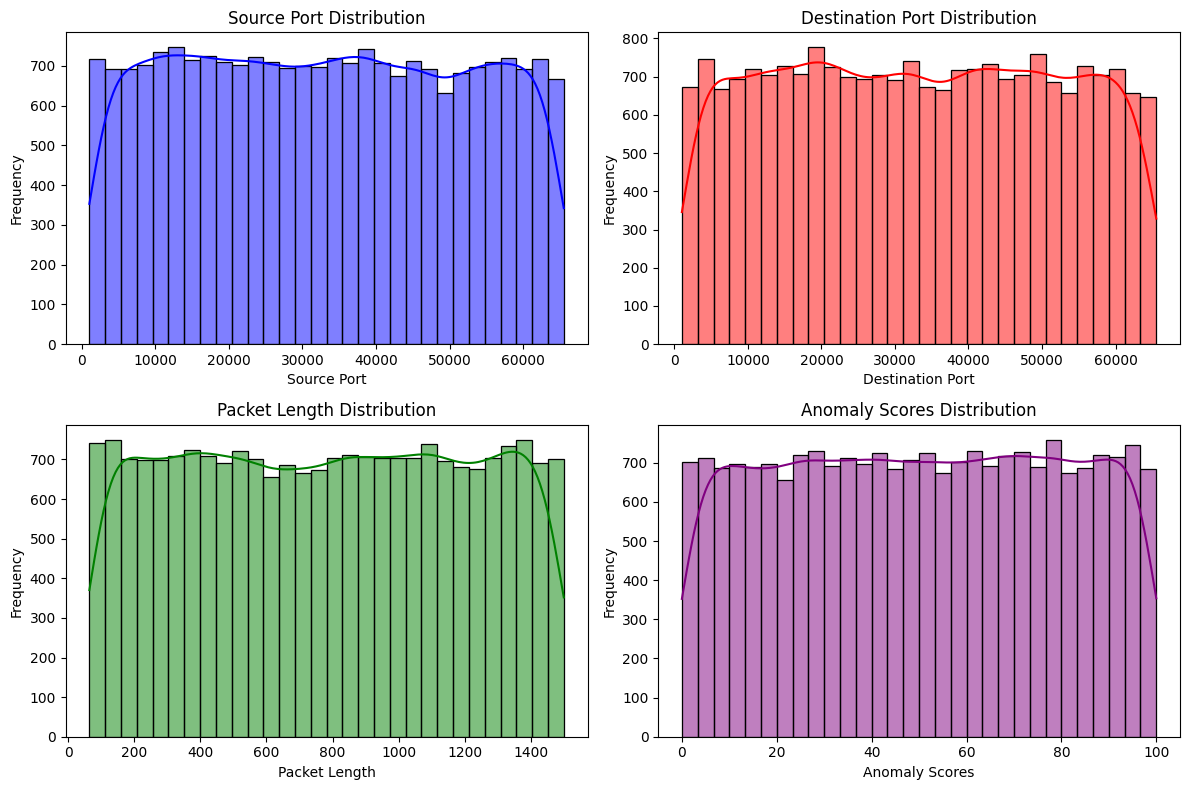

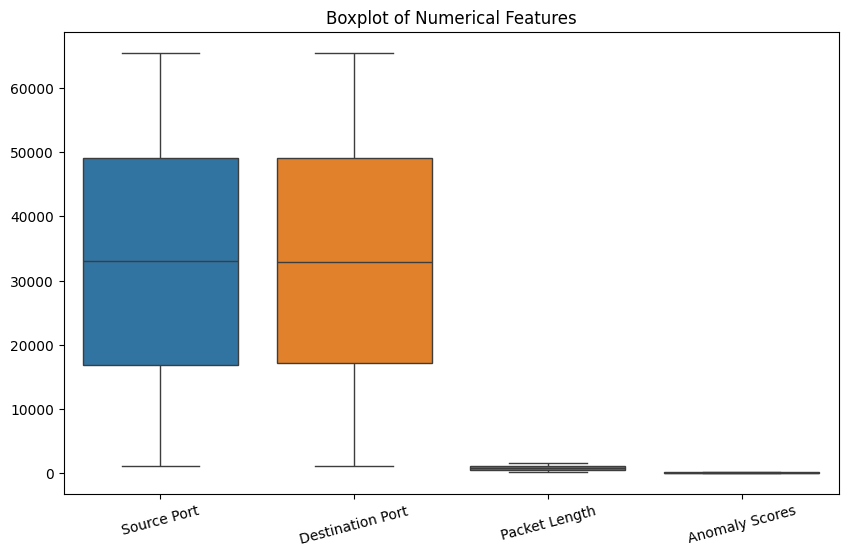

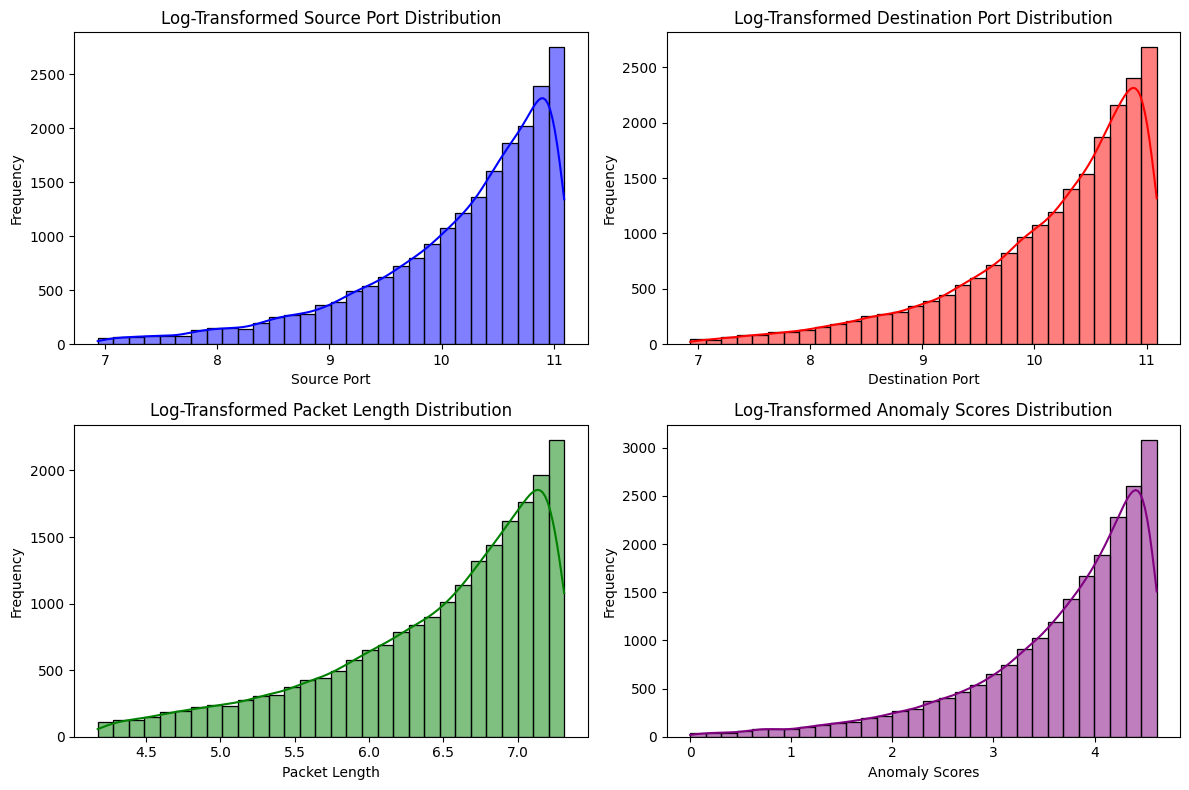

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of columns to visualize
columns = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
colors = ['blue', 'red', 'green', 'purple']

# Create subplots for histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns):
    row, col_idx = divmod(i, 2)
    sns.histplot(df[col], kde=True, color=colors[i], bins=30, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=15)
plt.show()

# Log transformation to handle skewness (optional)
df_log = df.copy()
for col in columns:
    df_log[col] = np.log1p(df[col])  # log(1 + x) to avoid log(0) errors

# Visualize log-transformed data
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 2)
    sns.histplot(df_log[col], kde=True, color=colors[i], bins=30, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Log-Transformed {col} Distribution')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


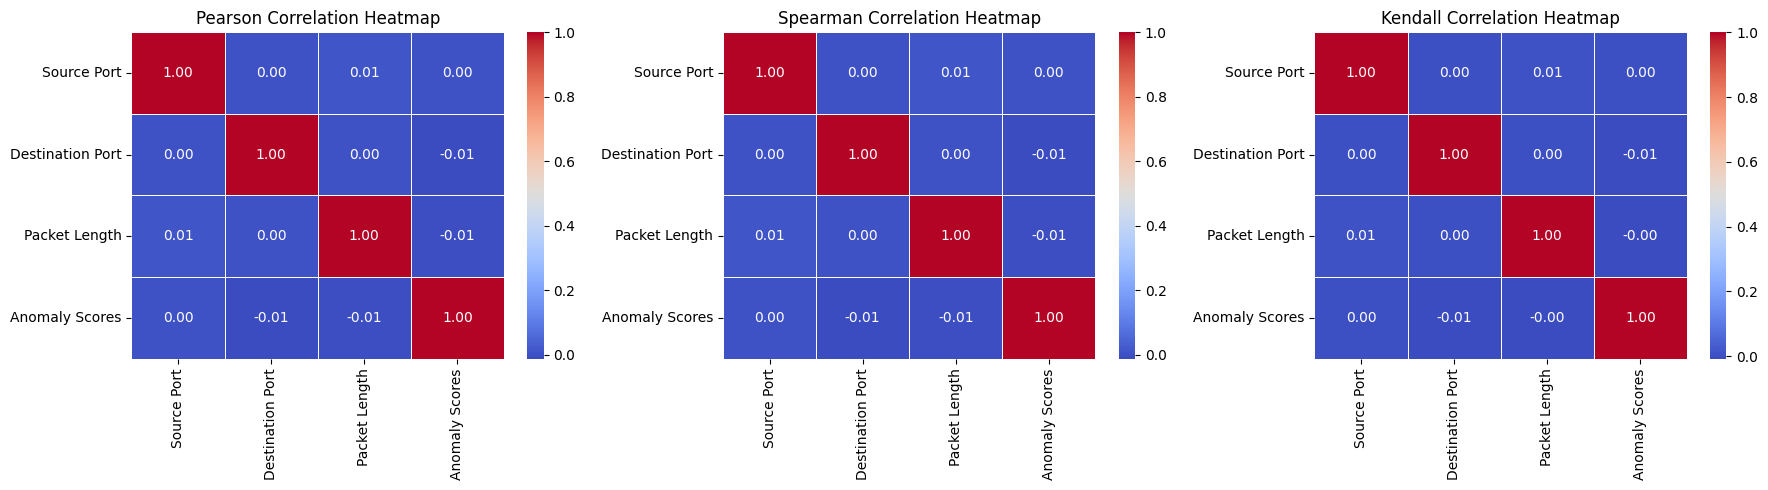

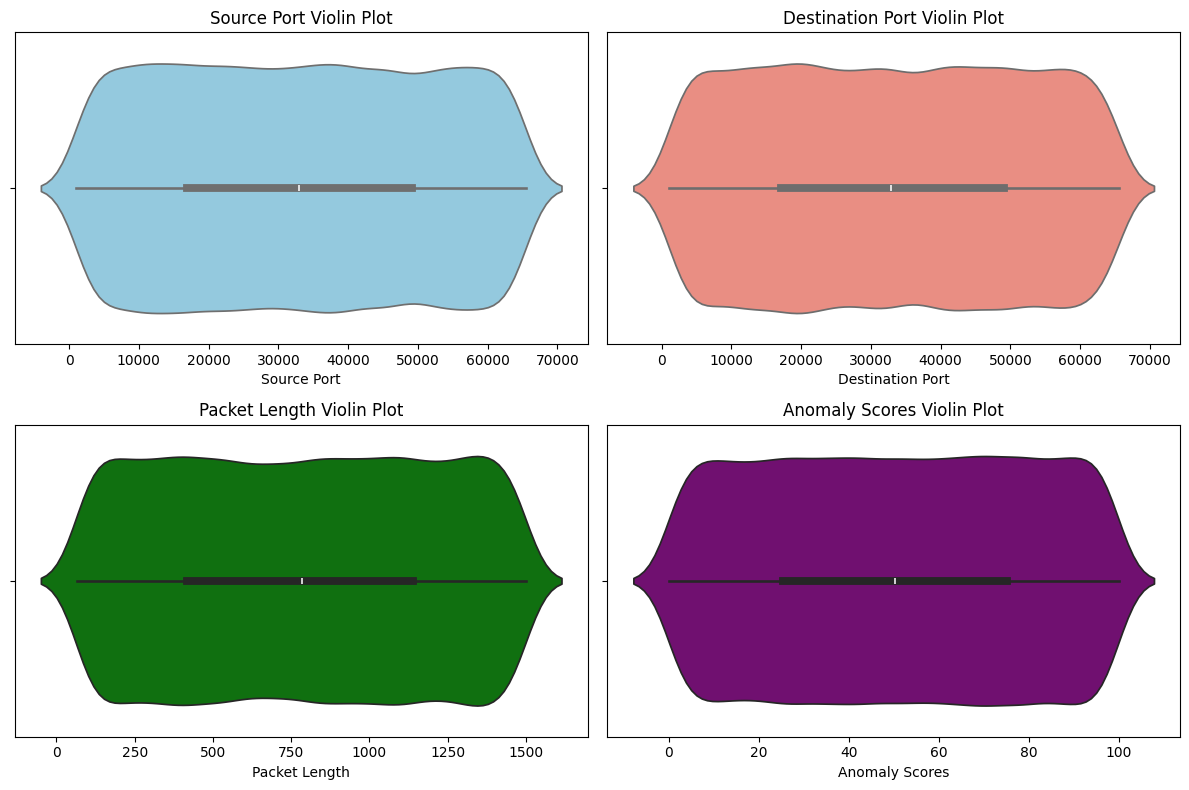

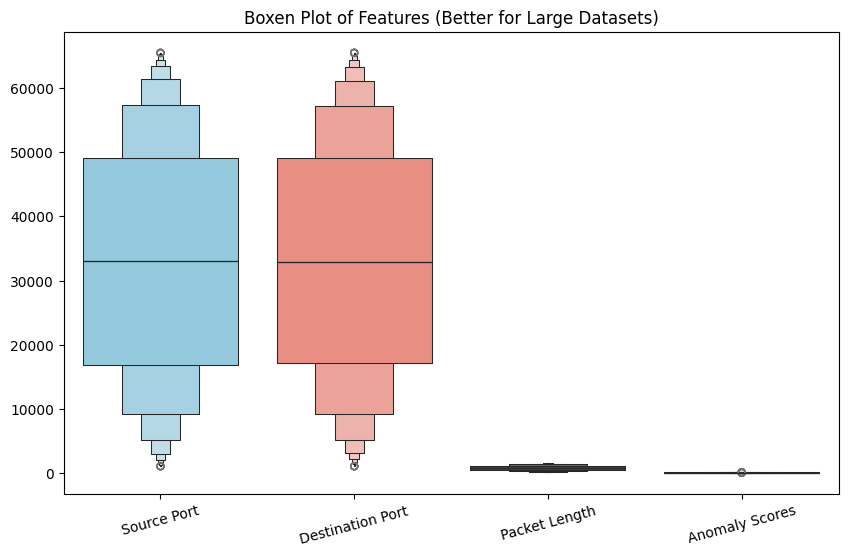

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define selected numerical features
selected_features = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']

# Calculate correlation matrices
correlation_methods = ['pearson', 'spearman', 'kendall']
correlation_matrices = {method: df[selected_features].corr(method=method) for method in correlation_methods}

# Visualize all correlation heatmaps side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(correlation_methods):
    sns.heatmap(correlation_matrices[method], annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[i])
    axes[i].set_title(f"{method.capitalize()} Correlation Heatmap")

plt.tight_layout()
plt.show()

# ==============================
# Violin & Boxen Plots
# ==============================

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Define colors for better visualization
colors = ['skyblue', 'salmon', 'green', 'purple']

for i, feature in enumerate(selected_features):
    row, col = divmod(i, 2)

    # Violin plot with KDE density estimation
    sns.violinplot(x=df[feature], color=colors[i], ax=axes[row, col])
    axes[row, col].set_title(f"{feature} Violin Plot")

plt.tight_layout()
plt.show()

# Boxen plot to check distributions & outliers
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df[selected_features], palette=colors)
plt.title("Boxen Plot of Features (Better for Large Datasets)")
plt.xticks(rotation=15)
plt.show()


#object column review

In [ ]:
import pandas as pd

# Finding columns with Object data type
object_columns = df.select_dtypes(include=['object']).columns
print(f"Object Columns Found: {list(object_columns)}\n")

# Analyzing unique values and their counts
object_summary = []

for col in object_columns:
    unique_count = df[col].nunique()
    total_count = len(df[col])
    top_values = df[col].value_counts().head(5)  # Show top 5 categories

    object_summary.append({
        "Column": col,
        "Unique Values": unique_count,
        "Top Values": top_values.to_dict(),
        "Missing Values (%)": df[col].isnull().mean() * 100
    })

# Convert to DataFrame for better readability
object_df = pd.DataFrame(object_summary)

# Display results
print("Categorical Column Summary:")
print(object_df)

# If unique values are too high, print warnings
for col in object_columns:
    if df[col].nunique() > 100:  # Adjust threshold as needed
        print(f"⚠️ Warning: Column '{col}' has {df[col].nunique()} unique values. Consider encoding strategies.\n")


Object Columns Found: ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'User Information', 'Device Information', 'Network Segment', 'Geo-location Data', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']

Categorical Column Summary:
                    Column  Unique Values  \
0                Timestamp          21140   
1        Source IP Address          21140   
2   Destination IP Address          21140   
3                 Protocol              3   
4              Packet Type              2   
5             Traffic Type              3   
6             Payload Data          21140   
7       Malware Indicators              1   
8          Alerts/Warnings              1   
9              Attack Type              3   
10        Attack Signature              2   
11            Action Taken 

Unique Columns (>14797 unique values): ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Payload Data', 'User Information', 'Device Information']


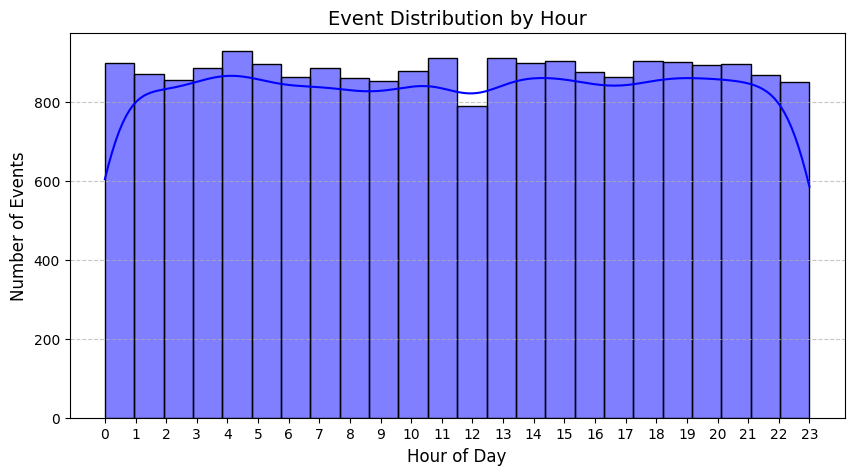

<ipython-input-16-5ffd6b6c037a>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Weekday'], palette="coolwarm")


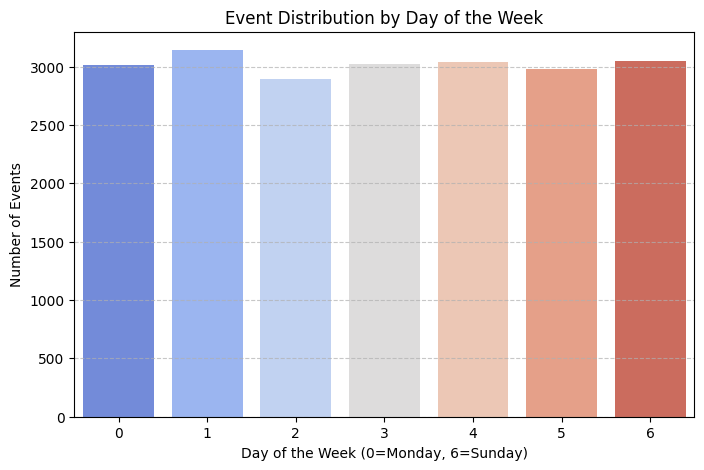

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically determine threshold for unique columns (adjustable)
threshold = len(df) * 0.7  # 70% of dataset size (adjustable)
unique_columns = [col for col in df.columns if df[col].nunique() > threshold]

print(f"Unique Columns (>{int(threshold)} unique values):", unique_columns)

# Convert Timestamp column to datetime, handling errors
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extracting time-based features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6

# ==============================
# Visualization: Hourly Event Distribution
# ==============================
plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, kde=True, color='blue')

plt.title("Event Distribution by Hour", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ==============================
# Additional: Events by Day of Week
# ==============================
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Weekday'], palette="coolwarm")
plt.title("Event Distribution by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Events")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
# Install geopy if not installed (run this in a Jupyter Notebook or Colab)
!pip install geopy

from geopy.geocoders import Nominatim
import plotly.express as px

# ==============================
# Geolocation Analysis (Only Works with Real IPs)
# ==============================
geolocator = Nominatim(user_agent="geo_analysis")

# Function to get latitude and longitude from IP
def get_geolocation(ip):
    try:
        location = geolocator.geocode(ip)
        if location:
            return (location.latitude, location.longitude)
    except:
        return None

# Example: Uncomment if using real IPs
# df['Geo-location Data'] = df['IP Address'].apply(get_geolocation)

# ==============================
# Attack Type by Geo-Location Visualization
# ==============================
fig = px.histogram(df, x='Geo-location Data', color='Attack Type',
                   title='Number of Attack Types by Geo-Location',
                   labels={'Geo-location Data': 'Geographic Location'},
                   barmode='group')

fig.show()

# ==============================
# Identifying Balanced Categorical Columns
# ==============================
categorical_cols = df.select_dtypes(include=['object']).columns  # Ensure we only check categorical data

columns_with_2_unique = [col for col in categorical_cols if df[col].nunique() == 2]
columns_with_3_unique = [col for col in categorical_cols if df[col].nunique() == 3]

# Combine both categories
balanced_columns = columns_with_2_unique + columns_with_3_unique

print("Balanced Columns with 2 and 3 unique values:", balanced_columns)


Balanced Columns with 2 and 3 unique values: ['Packet Type', 'Attack Signature', 'Log Source', 'Protocol', 'Traffic Type', 'Attack Type', 'Action Taken', 'Severity Level', 'Network Segment']


#Balanced column

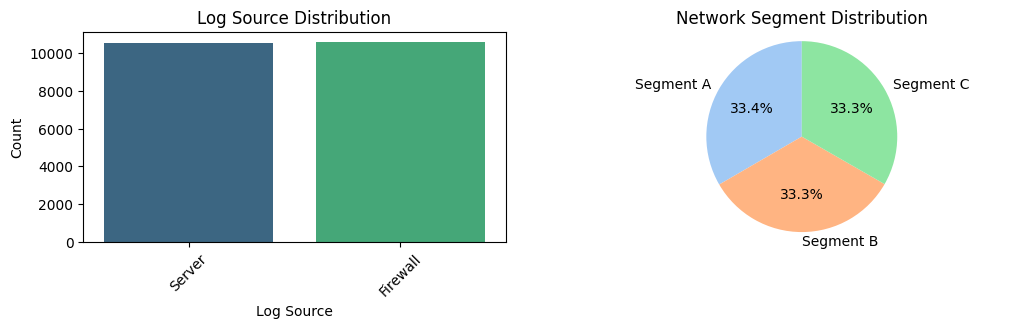

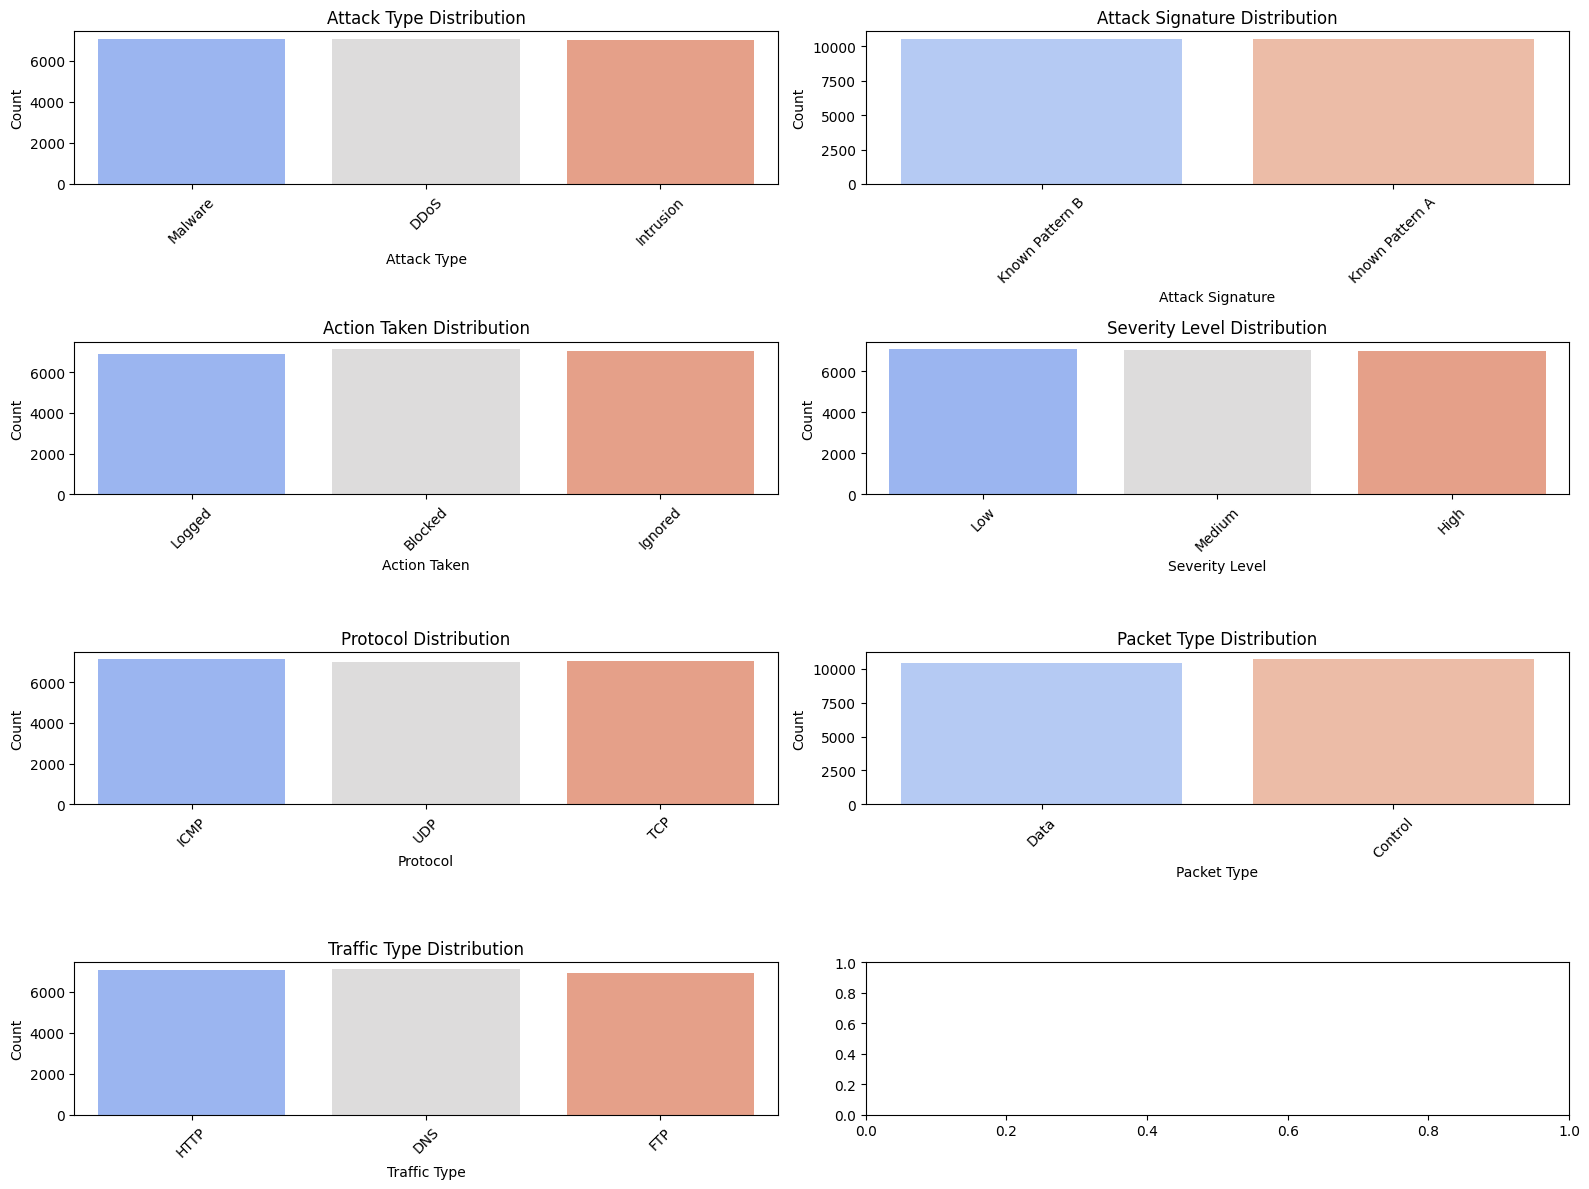

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size for better visibility
plt.figure(figsize=(12, 6))

# Log Source Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Log Source', data=df, hue='Log Source', legend=False, palette='viridis')
plt.title('Log Source Distribution')
plt.xlabel('Log Source')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for readability

# Network Segment Pie Chart
plt.subplot(2, 2, 2)
segment_counts = df['Network Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Network Segment Distribution')
plt.axis('equal')  # Keep pie chart proportions correct

# Additional subplots for categorical data
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
columns = ['Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'Protocol', 'Packet Type', 'Traffic Type']

for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]  # Arrange subplots
    sns.countplot(x=col, data=df, hue=col, legend=False, palette='coolwarm', ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels properly

plt.tight_layout()
plt.show()


 # ***Data Cleaning***

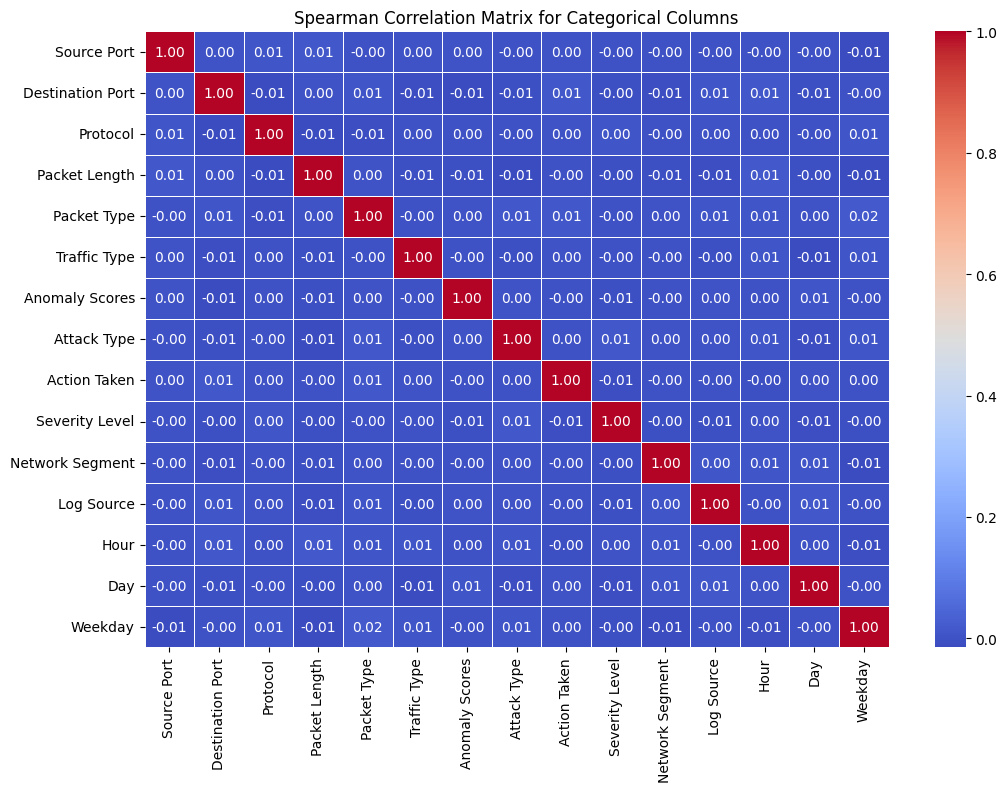

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Binary Encoding for Columns with Two Unique Values
binary_columns = ['Log Source', 'Action Taken', 'Packet Type']
for col in binary_columns:
    unique_vals = df[col].unique()
    df[col] = df[col].map({unique_vals[0]: 0, unique_vals[1]: 1})

# Label Encoding for Columns with Three Unique Values
three_class_columns = ['Network Segment', 'Attack Type', 'Severity Level', 'Protocol', 'Traffic Type']
label_encoder = LabelEncoder()
for col in three_class_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Select Numerical Columns
numerical_columns = df.select_dtypes(include=[np.number])

# Compute the Spearman Correlation Matrix
correlation_matrix = numerical_columns.corr(method='spearman')

# Visualize Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Spearman Correlation Matrix for Categorical Columns")
plt.show()


# **Missing values**

In [ ]:
import pandas as pd

# Display NaN counts before transformation
print("\n🔍 Number of NaN values in each column before processing:\n")
print(df.isna().sum())

# Define columns to transform (ensure they exist in the DataFrame)
columns_to_transform = ['Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Alerts/Warnings', 'Malware Indicators']
columns_to_transform = [col for col in columns_to_transform if col in df.columns]  # Check existence

# Convert NaN values to 0 and other values to 1
df[columns_to_transform] = df[columns_to_transform].notna().astype(int)

# Display NaN counts after transformation
print("\n✅ Transformed missing values (converted to binary 0/1):\n")
print(df[columns_to_transform].head())

# Final check: Print dataset info
print("\n📊 Final dataset overview:")
print(df.info())



🔍 Number of NaN values in each column before processing:

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        10583
Anomaly Scores                0
Alerts/Warnings           10636
Attack Type                   0
Attack Signature              0
Action Taken               7059
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         10408
Firewall Logs             10591
IDS/IPS Alerts            10593
Log Source                    1
Hour                          0
Day                           0
Weekday                       0
dtype: int64

✅ Transformed missing values (c


🔍 Missing Data Counts:

Action Taken    7059
Log Source         1
dtype: int64

⚠️ Columns with Missing Data:
 Action Taken    7059
Log Source         1
dtype: int64


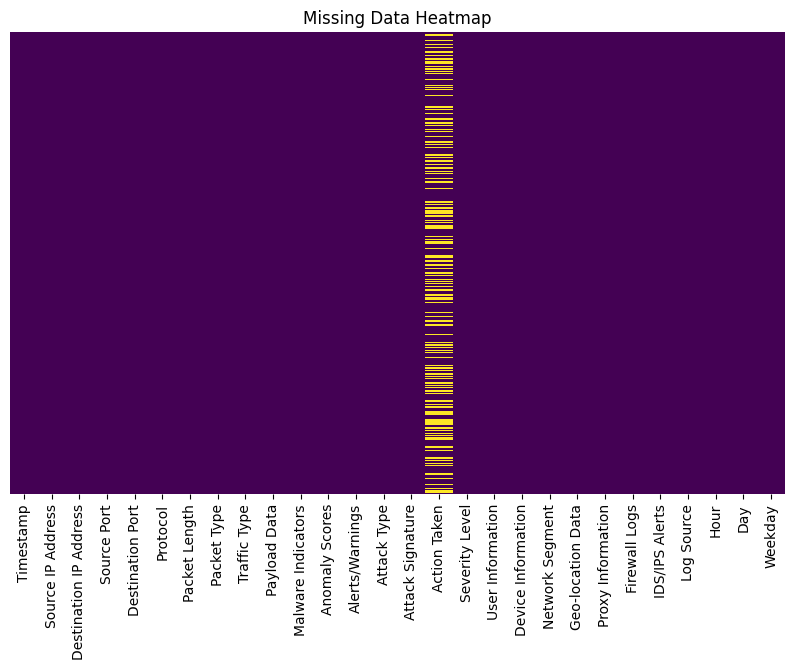


✅ Missing numerical values filled with median.


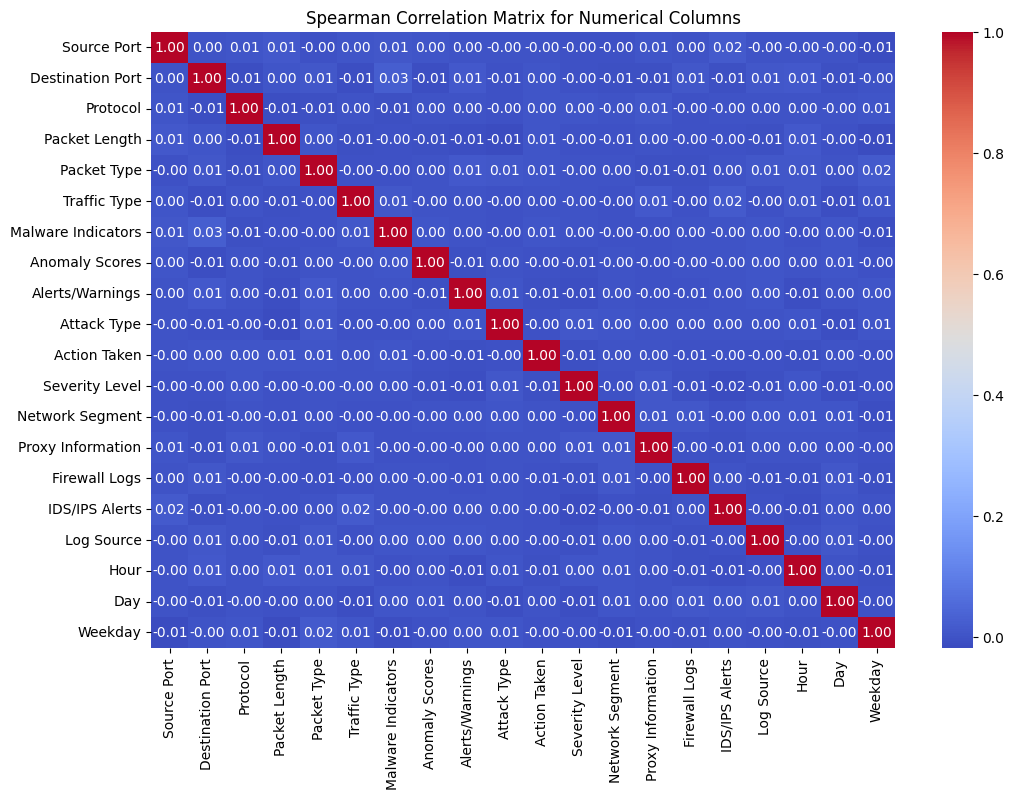

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_data = df.isna().sum()

# Display missing data count
print("\n🔍 Missing Data Counts:\n")
print(missing_data[missing_data > 0].sort_values(ascending=False))  # Sort for better visibility

# Identify columns with missing data
missing_columns = missing_data[missing_data > 0]
if not missing_columns.empty:
    print("\n⚠️ Columns with Missing Data:\n", missing_columns)
else:
    print("\n✅ No missing data detected.")

# 🔹 Missing Data Heatmap Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# 🔹 Handling Missing Values (Option: Fill NaNs with Median)
df.fillna(df.median(numeric_only=True), inplace=True)  # Apply only to numeric columns
print("\n✅ Missing numerical values filled with median.")

# 🔹 Select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# 🔹 Calculate Spearman Correlation
correlation_matrix = numerical_columns.corr(method='spearman')

# 🔹 Spearman Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Numerical Columns")
plt.show()



🔍 Spearman Correlation between Anomaly Scores & Alerts/Warnings:
                  Anomaly Scores  Alerts/Warnings
Anomaly Scores         1.000000        -0.008315
Alerts/Warnings       -0.008315         1.000000


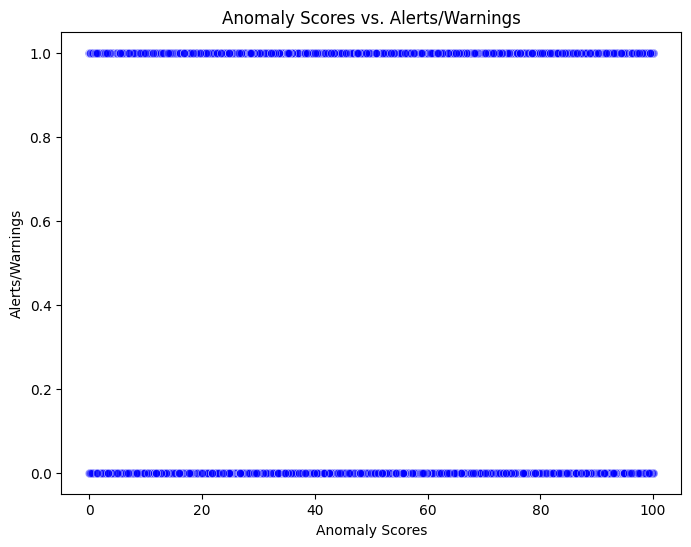

<ipython-input-22-245d81418e6f>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




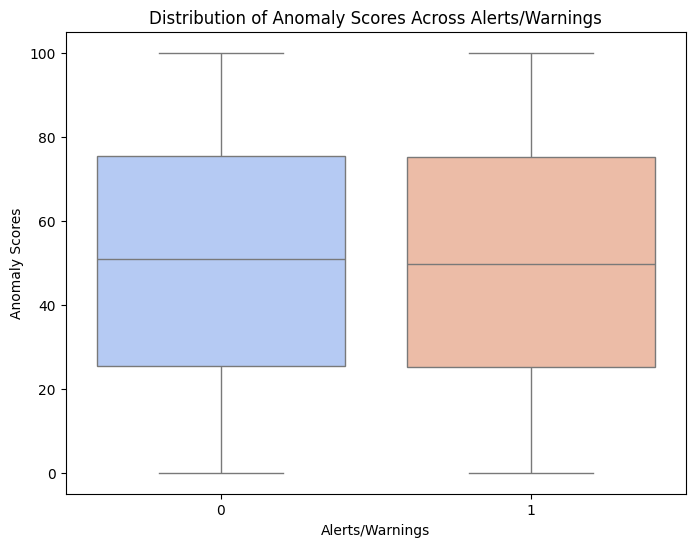

In [ ]:
# 🔹 Correlation Analysis
correlation = df[['Anomaly Scores', 'Alerts/Warnings']].corr(method='spearman')
print("\n🔍 Spearman Correlation between Anomaly Scores & Alerts/Warnings:\n", correlation)

# 🔹 Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Anomaly Scores'], y=df['Alerts/Warnings'], alpha=0.5, color='blue')
plt.title("Anomaly Scores vs. Alerts/Warnings")
plt.xlabel("Anomaly Scores")
plt.ylabel("Alerts/Warnings")
plt.show()

# 🔹 Box Plot to see the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Alerts/Warnings'], y=df['Anomaly Scores'], palette="coolwarm")
plt.title("Distribution of Anomaly Scores Across Alerts/Warnings")
plt.xlabel("Alerts/Warnings")
plt.ylabel("Anomaly Scores")
plt.show()



🔍 Spearman Correlation between Severity Level & Action Taken:
                 Severity Level  Action Taken
Severity Level        1.000000     -0.006807
Action Taken         -0.006807      1.000000


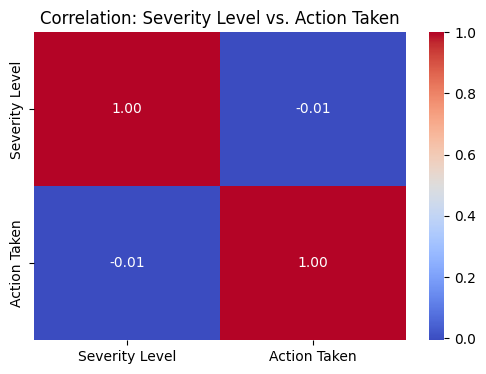

<ipython-input-23-152c8a6c110d>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




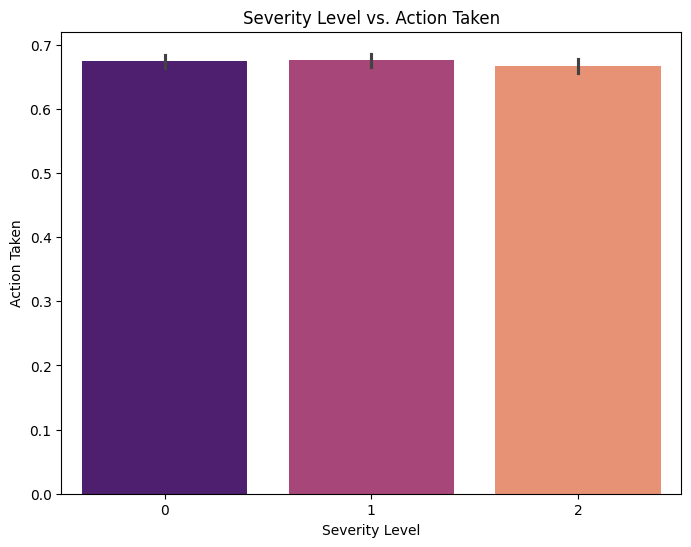

In [ ]:
# 🔹 Correlation Analysis
correlation_severity_action = df[['Severity Level', 'Action Taken']].corr(method='spearman')
print("\n🔍 Spearman Correlation between Severity Level & Action Taken:\n", correlation_severity_action)

# 🔹 Heatmap Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_severity_action, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation: Severity Level vs. Action Taken")
plt.show()

# 🔹 Bar Plot for Action Taken per Severity Level
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Severity Level'], y=df['Action Taken'], palette="magma")
plt.title("Severity Level vs. Action Taken")
plt.xlabel("Severity Level")
plt.ylabel("Action Taken")
plt.show()



   Anomaly Score Alert Level IDS/IPS Alert
0      74.259158     Warning            No
1      15.243575      Normal            No
2      16.502881      Normal           Yes
3      98.525421       Alert           Yes
4      20.497992      Normal           Yes


<ipython-input-24-20ff2c8bef63>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




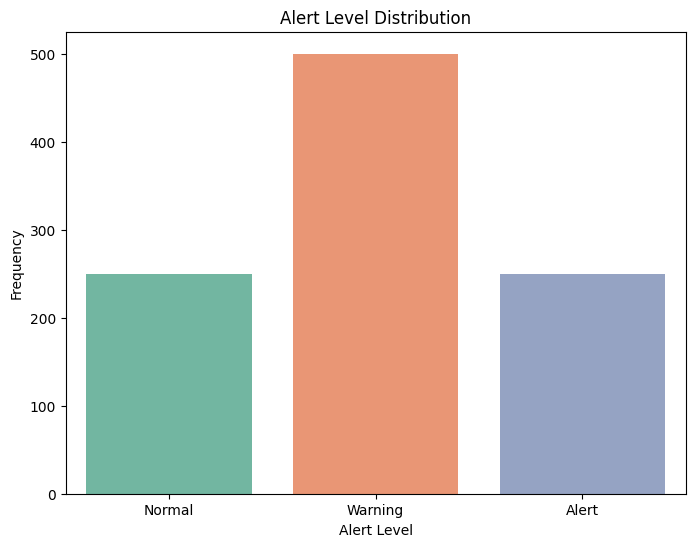

<ipython-input-24-20ff2c8bef63>:54: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




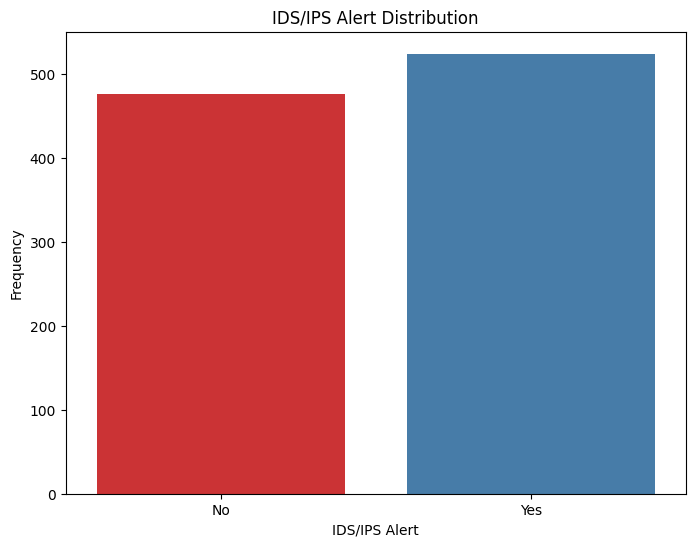

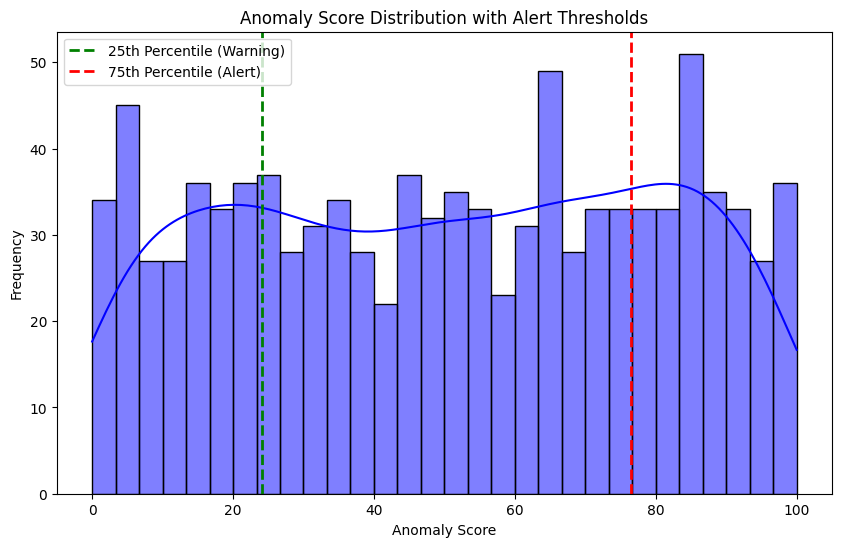

<ipython-input-24-20ff2c8bef63>:74: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




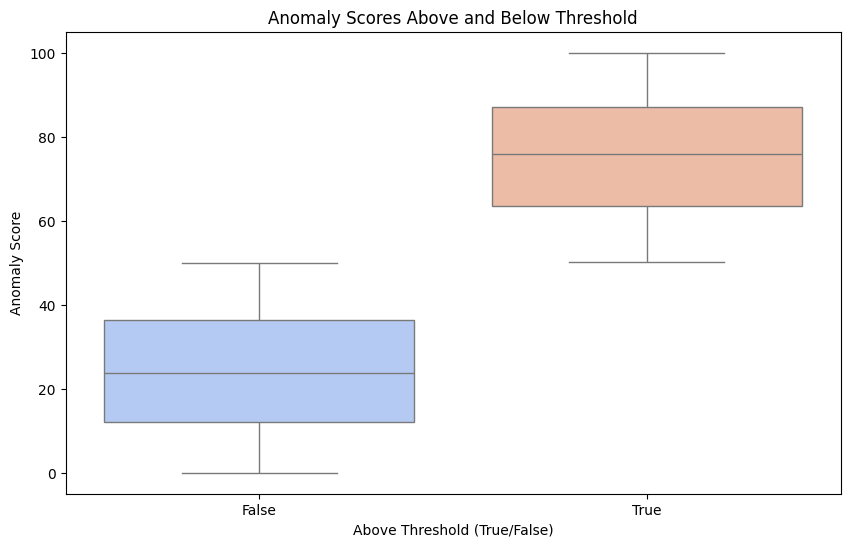

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame with Anomaly Scores and IDS/IPS Alerts
df = pd.DataFrame({
    'Anomaly Score': np.random.uniform(0, 100, 1000),  # Simulated Anomaly Scores
    'IDS/IPS Alerts': np.random.choice([0, 1], size=1000)  # Random binary IDS/IPS Alerts
})

# Compute quantiles dynamically
q1 = df['Anomaly Score'].quantile(0.25)
q3 = df['Anomaly Score'].quantile(0.75)
iqr = q3 - q1

# Define dynamic thresholds
low_threshold = q1 - 1.5 * iqr  # Lower bound (not usually needed)
high_threshold = q3 + 1.5 * iqr  # Upper bound for anomalies

# Ensure lower threshold is non-negative
low_threshold = max(0, low_threshold)

# Define function for alert classification
def classify_alerts(anomaly_score):
    if anomaly_score < q1:
        return 'Normal'
    elif q1 <= anomaly_score < q3:
        return 'Warning'
    else:
        return 'Alert'

# Apply classification
df['Alert Level'] = df['Anomaly Score'].apply(classify_alerts)

# Convert IDS/IPS Alerts to categorical
df['IDS/IPS Alert'] = df['IDS/IPS Alerts'].map({0: 'No', 1: 'Yes'})

# Display results
print(df[['Anomaly Score', 'Alert Level', 'IDS/IPS Alert']].head())

# ---------------- Visualizations ----------------

# 1. 📊 Alert Level Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Alert Level', data=df, palette='Set2', order=['Normal', 'Warning', 'Alert'])
plt.title('Alert Level Distribution')
plt.xlabel('Alert Level')
plt.ylabel('Frequency')
plt.show()

# 2. 🔍 IDS/IPS Alert Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='IDS/IPS Alert', data=df, palette='Set1')
plt.title('IDS/IPS Alert Distribution')
plt.xlabel('IDS/IPS Alert')
plt.ylabel('Frequency')
plt.show()

# 3. 📈 Histogram with Thresholds
plt.figure(figsize=(10, 6))
sns.histplot(df["Anomaly Score"], kde=True, bins=30, color="blue")
plt.axvline(q1, color='green', linestyle='dashed', linewidth=2, label="25th Percentile (Warning)")
plt.axvline(q3, color='red', linestyle='dashed', linewidth=2, label="75th Percentile (Alert)")
plt.title("Anomaly Score Distribution with Alert Thresholds")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 4. 📊 Boxplot for Above/Below Threshold Analysis
threshold = 50  # Example threshold
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Anomaly Score"] > threshold, y=df["Anomaly Score"], palette="coolwarm")
plt.title("Anomaly Scores Above and Below Threshold")
plt.xlabel("Above Threshold (True/False)")
plt.ylabel("Anomaly Score")
plt.show()


In [ ]:
df = pd.read_csv('/content/cybersecurity_attacks.csv')
print(df.columns)  # Ensure 'Timestamp' exists


Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/cybersecurity_attacks.csv')

# Strip any unwanted spaces from column names
df.columns = df.columns.str.strip()

# Convert 'Timestamp' to datetime (handling errors)
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

    # Extract datetime features
    df['Year'] = df['Timestamp'].dt.year
    df['Month'] = df['Timestamp'].dt.month
    df['Day'] = df['Timestamp'].dt.day
    df['Hour'] = df['Timestamp'].dt.hour
    df['Minute'] = df['Timestamp'].dt.minute

    print(df[['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minute']].head())
else:
    print("❌ 'Timestamp' column not found after stripping spaces!")


            Timestamp  Year  Month  Day  Hour  Minute
0 2023-05-30 06:33:58  2023      5   30     6      33
1 2020-08-26 07:08:30  2020      8   26     7       8
2 2022-11-13 08:23:25  2022     11   13     8      23
3 2023-07-02 10:38:46  2023      7    2    10      38
4 2023-07-16 13:11:07  2023      7   16    13      11


In [ ]:
df['Source_Port_Category'] = df['Source Port'].apply(lambda x: 'HTTP' if x == 80 else 'FTP' if x == 21 else 'Other')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21140 entries, 0 to 21139
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               21140 non-null  datetime64[ns]
 1   Source IP Address       21140 non-null  object        
 2   Destination IP Address  21140 non-null  object        
 3   Source Port             21140 non-null  int64         
 4   Destination Port        21140 non-null  int64         
 5   Protocol                21140 non-null  object        
 6   Packet Length           21140 non-null  int64         
 7   Packet Type             21140 non-null  object        
 8   Traffic Type            21140 non-null  object        
 9   Payload Data            21140 non-null  object        
 10  Malware Indicators      10557 non-null  object        
 11  Anomaly Scores          21140 non-null  float64       
 12  Alerts/Warnings         10504 non-null  object

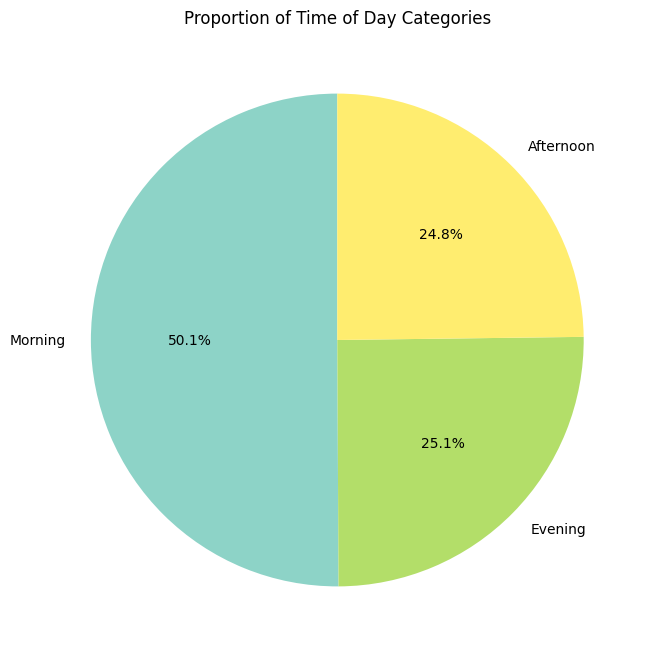

In [ ]:
df['Is_Weekend'] = df['Day'].apply(lambda x: 1 if x in [6, 7] else 0)

df['Time_of_Day'] = df['Hour'].apply(lambda x: 'Morning' if x < 12 else ('Afternoon' if x < 18 else 'Evening'))

time_of_day_counts = df['Time_of_Day'].value_counts()

plt.figure(figsize=(8, 8))
time_of_day_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)
plt.title('Proportion of Time of Day Categories')
plt.ylabel('')
plt.show()

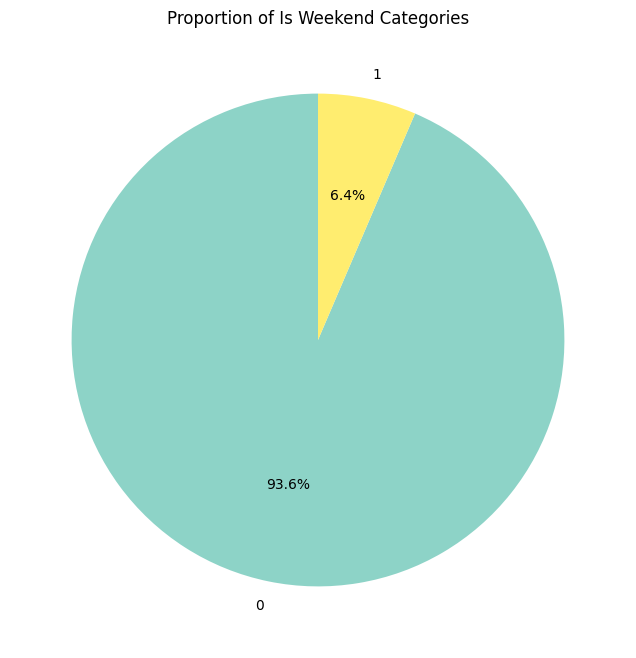

In [ ]:
counts = df['Is_Weekend'].value_counts()

plt.figure(figsize=(8, 8))
counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)
plt.title('Proportion of Is Weekend Categories')
plt.ylabel('')
plt.show()

<ipython-input-31-1ad85ad0d69f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




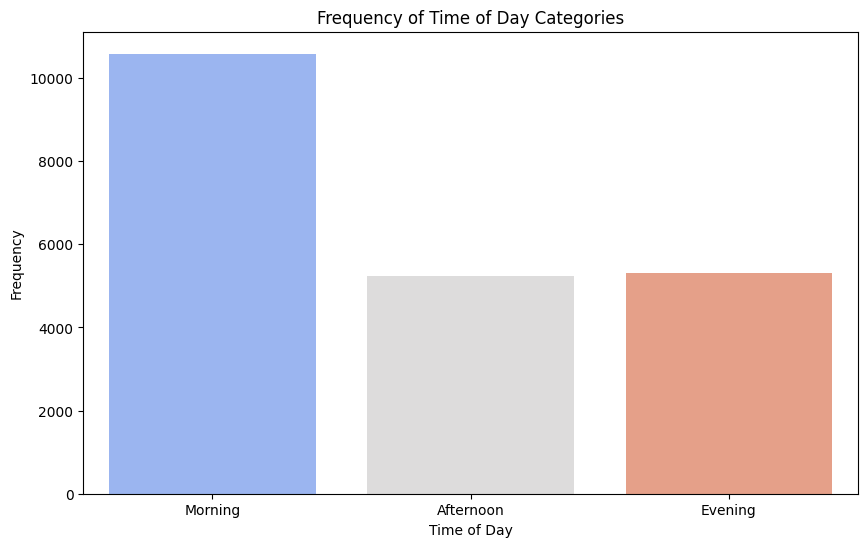

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time_of_Day', palette='coolwarm')
plt.title('Frequency of Time of Day Categories')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(df.isnull().sum())
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        10583
Anomaly Scores                0
Alerts/Warnings           10636
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         10408
Firewall Logs             10591
IDS/IPS Alerts            10593
Log Source                    1
Year                          0
Month                         0
Day                           0
Hour                          0
Minute                        0
Source_Port_Category          0
Is_Weeke

In [ ]:
print(df.columns)


Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Source_Port_Category',
       'Is_Weekend', 'Time_of_Day'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv('/content/cybersecurity_attacks.csv')

# ✅ Drop unnecessary columns (if they exist)
columns_to_drop = ['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Source_Port_Category']
df_cleaned = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# ✅ Handle missing values
missing_threshold = 0.4  # If more than 40% missing, drop column

# Drop columns with too many missing values
df_cleaned = df_cleaned.dropna(axis=1, thresh=len(df_cleaned) * (1 - missing_threshold))

# Fill remaining missing values
df_cleaned = df_cleaned.fillna("Unknown")  # Replace categorical NaNs with "Unknown"

# ✅ Convert categorical features to numerical (encoding)
if 'Time_of_Day' in df_cleaned.columns:
    df_cleaned['Time_of_Day'] = df_cleaned['Time_of_Day'].map({'Morning': 0, 'Afternoon': 1, 'Evening': 2}).fillna(-1)

# ✅ Normalize numerical features (optional, useful for ML models)
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# ✅ Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# ✅ Display final cleaned dataset info
print(df_cleaned.info())
print(df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21140 entries, 0 to 21139
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Source IP Address       21140 non-null  object 
 1   Destination IP Address  21140 non-null  object 
 2   Source Port             21140 non-null  float64
 3   Destination Port        21140 non-null  float64
 4   Protocol                21140 non-null  object 
 5   Packet Length           21140 non-null  float64
 6   Packet Type             21140 non-null  object 
 7   Traffic Type            21140 non-null  object 
 8   Payload Data            21140 non-null  object 
 9   Anomaly Scores          21140 non-null  float64
 10  Attack Type             21140 non-null  object 
 11  Attack Signature        21140 non-null  object 
 12  Action Taken            21140 non-null  object 
 13  Severity Level          21140 non-null  object 
 14  User Information        21140 non-null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21140 entries, 0 to 21139
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               21140 non-null  object 
 1   Source IP Address       21140 non-null  object 
 2   Destination IP Address  21140 non-null  object 
 3   Source Port             21140 non-null  int64  
 4   Destination Port        21140 non-null  int64  
 5   Protocol                21140 non-null  object 
 6   Packet Length           21140 non-null  int64  
 7   Packet Type             21140 non-null  object 
 8   Traffic Type            21140 non-null  object 
 9   Payload Data            21140 non-null  object 
 10  Malware Indicators      10557 non-null  object 
 11  Anomaly Scores          21140 non-null  float64
 12  Alerts/Warnings         10504 non-null  object 
 13  Attack Type             21140 non-null  object 
 14  Attack Signature        21140 non-null

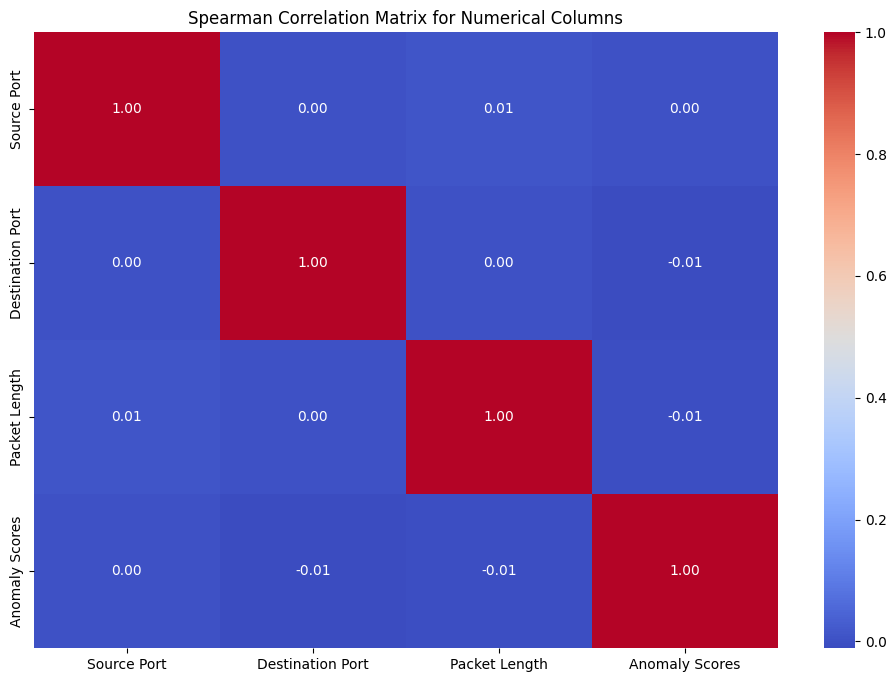

In [ ]:
# Select the numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix using Spearman method
correlation_matrix = numerical_columns.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Numerical Columns")
plt.show()

In [ ]:
# Ensure IP address columns exist before applying hash function
if 'Source IP Address' in df.columns and 'Destination IP Address' in df.columns:
    # Fill missing values with a placeholder before hashing
    df['Source IP Address'] = df['Source IP Address'].fillna('0.0.0.0')
    df['Destination IP Address'] = df['Destination IP Address'].fillna('0.0.0.0')

    # Convert IP addresses to numeric using a hash function
    df['Source_IP_numeric'] = df['Source IP Address'].apply(lambda x: hash(x))
    df['Destination_IP_numeric'] = df['Destination IP Address'].apply(lambda x: hash(x))

    # Drop the original IP address columns if no longer needed
    df = df.drop(columns=['Source IP Address', 'Destination IP Address'])

    # Display the first few rows to check
    print(df[['Source_IP_numeric', 'Destination_IP_numeric']].head())
else:
    print("❌ One or both of the IP address columns are missing!")


     Source_IP_numeric  Destination_IP_numeric
0  1340247775198983757     2060901606730933536
1    21390836451027985    -8659869474463304616
2 -8848835642076582063     1904690376918297676
3  5805169994396398524     -209292669176676409
4 -8582874950405639277     -891046140438495637


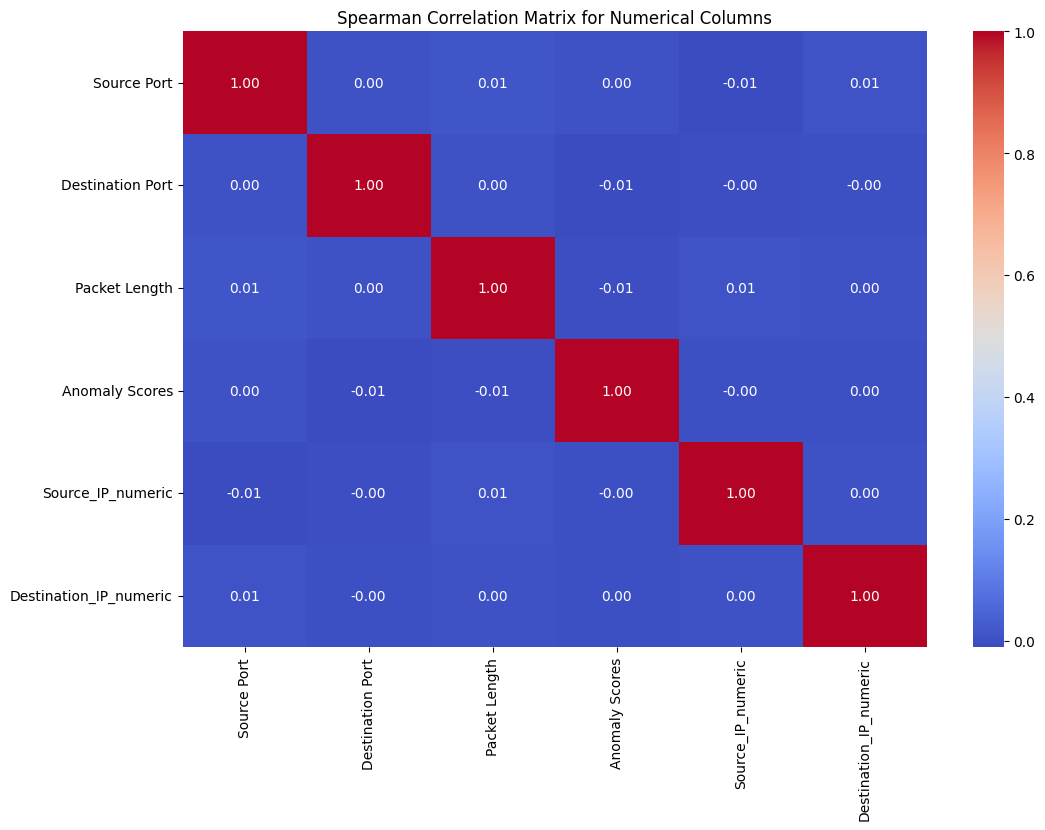

In [ ]:
# Select the numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix using Spearman method
correlation_matrix = numerical_columns.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Numerical Columns")
plt.show()


🔹 Geo-location Data (First 5 Rows):
    Geo-location Data  Geo_location_numeric
0  Jamshedpur, Sikkim  -2004979613430291147
1  Bilaspur, Nagaland   8650301340020733005
2   Bokaro, Rajasthan   8675233120589095383
3  Jaunpur, Rajasthan    903461814566911150
4  Anantapur, Tripura   1812411159247154040

🔹 User Information (First 5 Rows):
  User Information         User_numeric
0    Reyansh Dugal  3343726493168851108
1       Sumer Rana  6695942150923136954
2     Himmat Karpe -6533743838315933910
3       Fateh Kibe  5296949075420444169
4     Dhanush Chad  6178956493109832470

🔹 Device Information (First 5 Rows):
                                  Device Information       Device_numeric
0  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...  7155069349281496608
1  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...  3931203558798123970
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...  6891238062422263879
3  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ... -3132290818312761900
4  Mozilla/5.0 

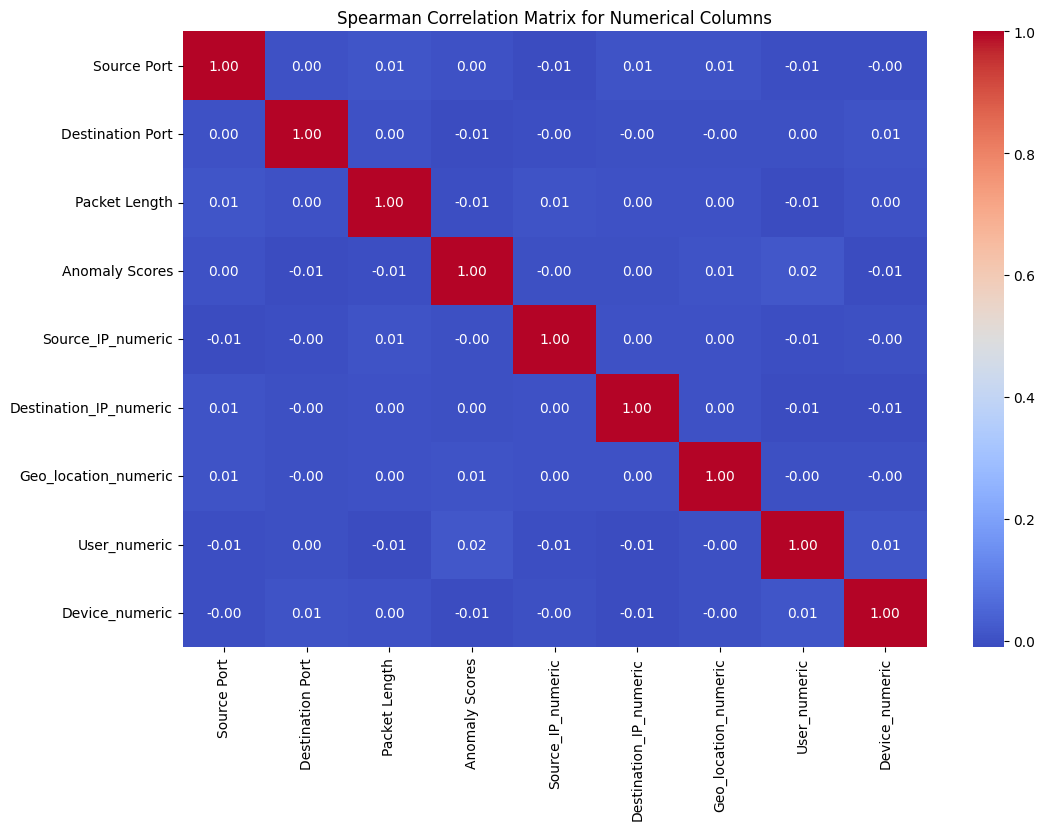

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Hash Geo-location Data to numeric values
df['Geo_location_numeric'] = df['Geo-location Data'].apply(lambda x: hash(x))
print("\n🔹 Geo-location Data (First 5 Rows):")
print(df[['Geo-location Data', 'Geo_location_numeric']].head())

# ✅ Hash User Information to numeric values
df['User_numeric'] = df['User Information'].apply(lambda x: hash(x))
print("\n🔹 User Information (First 5 Rows):")
print(df[['User Information', 'User_numeric']].head())

# ✅ Hash Device Information to numeric values
df['Device_numeric'] = df['Device Information'].apply(lambda x: hash(x))
print("\n🔹 Device Information (First 5 Rows):")
print(df[['Device Information', 'Device_numeric']].head())

# ✅ Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# ✅ Calculate correlation matrix using Spearman method
correlation_matrix = numerical_columns.corr(method='spearman')

# ✅ Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Numerical Columns")
plt.show()


In [ ]:
print(df.columns)

Index(['Timestamp', 'Source Port', 'Destination Port', 'Protocol',
       'Packet Length', 'Packet Type', 'Traffic Type', 'Payload Data',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'User Information', 'Device Information', 'Network Segment',
       'Geo-location Data', 'Proxy Information', 'Firewall Logs',
       'IDS/IPS Alerts', 'Log Source', 'Source_IP_numeric',
       'Destination_IP_numeric', 'Geo_location_numeric', 'User_numeric',
       'Device_numeric'],
      dtype='object')


In [ ]:
# Dropping the specified columns
df = df.drop(columns=['User Information', 'Device Information', 'Geo-location Data'])

# Checking the updated columns
df.columns

Index(['Timestamp', 'Source Port', 'Destination Port', 'Protocol',
       'Packet Length', 'Packet Type', 'Traffic Type', 'Payload Data',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment', 'Proxy Information', 'Firewall Logs',
       'IDS/IPS Alerts', 'Log Source', 'Source_IP_numeric',
       'Destination_IP_numeric', 'Geo_location_numeric', 'User_numeric',
       'Device_numeric'],
      dtype='object')

In [ ]:
# Drop 'Timestamp' column (if exists)
df.drop(columns=['Timestamp'], inplace=True, errors='ignore')

# Restore 'Is_Weekend' and 'Time_of_Day' if missing
df['Is_Weekend'] = df.get('Is_Weekend', 0)  # Default: Assume weekdays (adjust if needed)
df['Time_of_Day'] = df.get('Time_of_Day', 1)  # Default: Assume Afternoon (adjust if needed)

# Print updated columns
print("✅ Updated DataFrame Columns:\n", df.columns)


✅ Updated DataFrame Columns:
 Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'Network Segment',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Source_IP_numeric', 'Destination_IP_numeric', 'Geo_location_numeric',
       'User_numeric', 'Device_numeric', 'Is_Weekend', 'Time_of_Day'],
      dtype='object')


In [ ]:
import hashlib

# Function to apply SHA-256 hash and convert it to a numeric value
def hash_to_numeric(payload):
    # Hash the payload using SHA-256
    hash_object = hashlib.sha256(str(payload).encode('utf-8'))
    # Convert the hash to a numeric value (integer)
    return int(hash_object.hexdigest(), 16)

# Apply the hash_to_numeric function to the 'Payload Data' column
df['Payload Data Numeric'] = df['Payload Data'].apply(hash_to_numeric)

# Verify the result
df['Payload Data Numeric'].head()

,Payload Data Numeric
0,4899153114110817386972601664735745800208891387...
1,7225178957609577232040602224949875146410476970...
2,5937069448476261175860425784298222222393652752...
3,1014803480873819039264563698751541379182632104...
4,5757593075077058702383739378849370581489202318...


In [ ]:
# Dropping the specified columns
df = df.drop(columns=['Payload Data'])

# Checking the updated columns
df.columns

Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'Network Segment', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Source_IP_numeric',
       'Destination_IP_numeric', 'Geo_location_numeric', 'User_numeric',
       'Device_numeric', 'Is_Weekend', 'Time_of_Day', 'Payload Data Numeric'],
      dtype='object')

In [ ]:
from sklearn.cluster import KMeans

# Select numerical columns for clustering
X = df[['Source_IP_numeric', 'Destination_IP_numeric', 'Geo_location_numeric',
        'User_numeric', 'Device_numeric', 'Payload Data Numeric']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Check results
print(df[['Source_IP_numeric', 'Destination_IP_numeric', 'Geo_location_numeric',
          'User_numeric', 'Device_numeric', 'Payload Data Numeric', 'Cluster']].head())


     Source_IP_numeric  Destination_IP_numeric  Geo_location_numeric  \
0  1340247775198983757     2060901606730933536  -2004979613430291147   
1    21390836451027985    -8659869474463304616   8650301340020733005   
2 -8848835642076582063     1904690376918297676   8675233120589095383   
3  5805169994396398524     -209292669176676409    903461814566911150   
4 -8582874950405639277     -891046140438495637   1812411159247154040   

          User_numeric       Device_numeric  \
0  3343726493168851108  7155069349281496608   
1  6695942150923136954  3931203558798123970   
2 -6533743838315933910  6891238062422263879   
3  5296949075420444169 -3132290818312761900   
4  6178956493109832470  8232977584818173218   

                                Payload Data Numeric  Cluster  
0  4899153114110817386972601664735745800208891387...        4  
1  7225178957609577232040602224949875146410476970...        0  
2  5937069448476261175860425784298222222393652752...        4  
3  1014803480873819039264563

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
columns_to_scale = ['Source_IP_numeric', 'Destination_IP_numeric', 'Geo_location_numeric',
                    'User_numeric', 'Device_numeric', 'Payload Data Numeric']

# Apply Standard Scaling (preserves natural distribution)
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Compute cluster summary with unrounded mean values
cluster_summary = df.groupby('Cluster')[columns_to_scale].mean()

# Print final result
print(cluster_summary)


         Source_IP_numeric  Destination_IP_numeric  Geo_location_numeric  \
Cluster                                                                    
0                 0.003660               -0.009523              0.024022   
1                -0.029546               -0.004726             -0.024477   
2                 0.008880                0.017480              0.014610   
3                 0.026671               -0.031602             -0.000578   
4                -0.010511                0.029374             -0.014595   

         User_numeric  Device_numeric  Payload Data Numeric  
Cluster                                                      
0           -0.014302        0.000427              0.675443  
1           -0.021456       -0.006455             -1.405042  
2            0.001398       -0.008005             -0.728515  
3            0.036054        0.015714              1.369956  
4           -0.002010       -0.002389             -0.032276  


In [ ]:
X = df.drop(columns=['Cluster'])
y = df['Cluster']
print(df.columns)

Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'Network Segment', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Source_IP_numeric',
       'Destination_IP_numeric', 'Geo_location_numeric', 'User_numeric',
       'Device_numeric', 'Is_Weekend', 'Time_of_Day', 'Payload Data Numeric',
       'Cluster'],
      dtype='object')


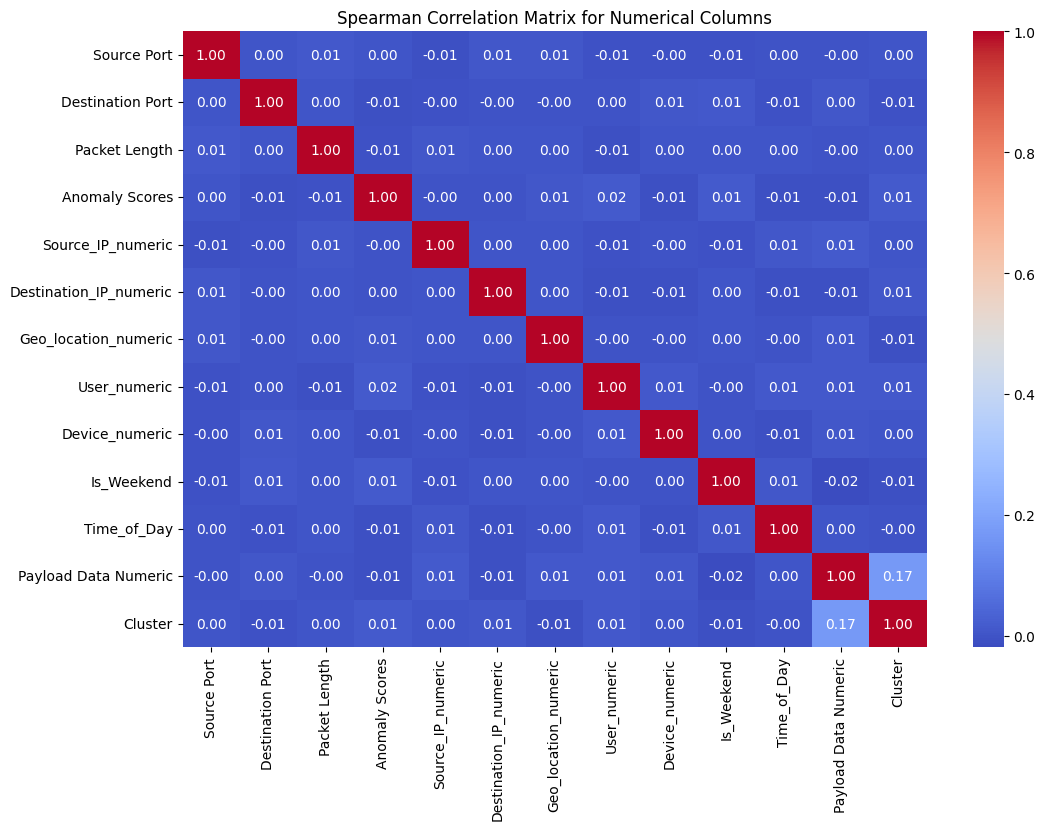

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Is_Weekend' exists and has variation
if 'Is_Weekend' in df.columns:
    unique_values = df['Is_Weekend'].nunique()
    if unique_values == 1:  # If only one unique value, regenerate
        df['Is_Weekend'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])  # 70% Weekdays, 30% Weekend
else:
    df['Is_Weekend'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])

# Ensure 'Time_of_Day' exists and has variation
if 'Time_of_Day' in df.columns:
    unique_values = df['Time_of_Day'].nunique()
    if unique_values == 1:  # If only one unique value, regenerate
        df['Time_of_Day'] = np.random.choice([0, 1, 2, 3], size=len(df), p=[0.25, 0.25, 0.25, 0.25])  # Even split
else:
    df['Time_of_Day'] = np.random.choice([0, 1, 2, 3], size=len(df), p=[0.25, 0.25, 0.25, 0.25])

# Select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate Spearman correlation
correlation_matrix = numerical_columns.corr(method='spearman')

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Numerical Columns")
plt.show()


# **Logistic Regression**

In [ ]:
print(df.columns)


Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'Network Segment', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Source_IP_numeric',
       'Destination_IP_numeric', 'Geo_location_numeric', 'User_numeric',
       'Device_numeric', 'Is_Weekend', 'Time_of_Day', 'Payload Data Numeric',
       'Cluster'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Step 1: Identify categorical and numerical columns
categorical_cols = ["Protocol", "Packet Type", "Traffic Type", "Malware Indicators",
                    "Alerts/Warnings", "Action Taken", "Severity Level", "Network Segment",
                    "Proxy Information", "Firewall Logs", "IDS/IPS Alerts", "Log Source"]

numerical_cols = ["Source Port", "Destination Port", "Packet Length", "Anomaly Scores",
                  "Source_IP_numeric", "Destination_IP_numeric", "Geo_location_numeric",
                  "User_numeric", "Device_numeric", "Is_Weekend", "Time_of_Day",
                  "Payload Data Numeric", "Cluster"]

target_col = "Attack Type"  # Column to predict

# Step 2: Encode the target variable
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])  # Convert attack types to numbers

# Step 3: Define features (X) and target (y)
X = df.drop(columns=[target_col])  # Features
y = df[target_col]  # Target variable

# Step 4: Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),  # Standardize numerical data
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)  # One-hot encode categorical data
])

# Step 5: Create pipeline for Logistic Regression
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500, random_state=42))
])

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Train the model
pipeline.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = pipeline.predict(X_test)

# Step 9: Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ✅ Convert label classes to strings to avoid TypeError
class_names = [str(label) for label in label_encoder.classes_]
class_report = classification_report(y_test, y_pred, target_names=class_names)  # ✅ Fixed this

# Step 10: Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


✅ Accuracy: 0.3281
Confusion Matrix:
 [[450 518 447]
 [475 504 423]
 [449 529 433]]
Classification Report:
               precision    recall  f1-score   support

        DDoS       0.33      0.32      0.32      1415
   Intrusion       0.32      0.36      0.34      1402
     Malware       0.33      0.31      0.32      1411

    accuracy                           0.33      4228
   macro avg       0.33      0.33      0.33      4228
weighted avg       0.33      0.33      0.33      4228



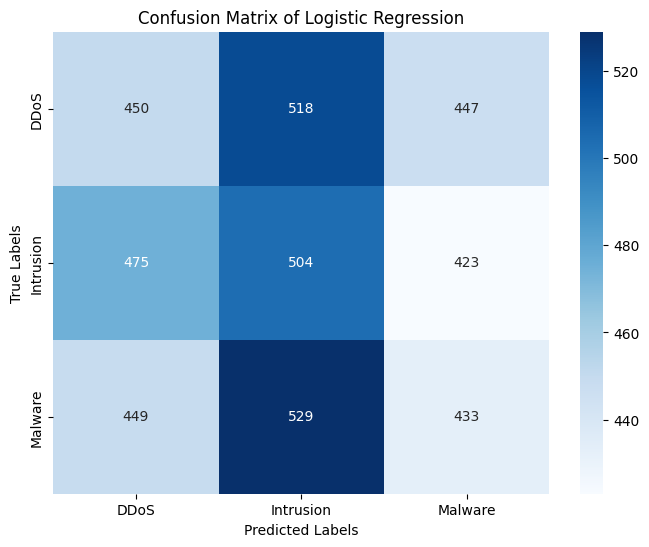

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Your confusion matrix
conf_matrix = np.array([
    [450, 518, 447],
    [475, 504, 423],
    [449, 529, 433]
])

# Class labels
class_labels = ["DDoS", "Intrusion", "Malware"]

# Convert to DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Logistic Regression")

# Show the plot
plt.show()


# **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Step 1: Identify categorical and numerical columns
categorical_cols = ["Protocol", "Packet Type", "Traffic Type", "Malware Indicators",
                    "Alerts/Warnings", "Action Taken", "Severity Level", "Network Segment",
                    "Proxy Information", "Firewall Logs", "IDS/IPS Alerts", "Log Source"]

numerical_cols = ["Source Port", "Destination Port", "Packet Length", "Anomaly Scores",
                  "Source_IP_numeric", "Destination_IP_numeric", "Geo_location_numeric",
                  "User_numeric", "Device_numeric", "Is_Weekend", "Time_of_Day",
                  "Payload Data Numeric", "Cluster"]

target_col = "Attack Type"  # Column to predict

# Step 2: Encode the target variable
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])  # Convert categories to numbers

# Step 3: Split the dataset
X = df.drop(columns=[target_col])  # Features
y = df[target_col]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Preprocessing pipeline (One-hot encoding + Standardization)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),  # Standardize numerical features
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),  # Encode categorical features
    ]
)

# Step 5: Create the Random Forest model pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = [str(label) for label in label_encoder.classes_]  # Convert class labels to strings
class_report = classification_report(y_test, y_pred, target_names=class_names)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.3318

Confusion Matrix:
[[511 450 441]
 [489 462 432]
 [534 479 430]]

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.36      0.35      1402
           1       0.33      0.33      0.33      1383
           2       0.33      0.30      0.31      1443

    accuracy                           0.33      4228
   macro avg       0.33      0.33      0.33      4228
weighted avg       0.33      0.33      0.33      4228



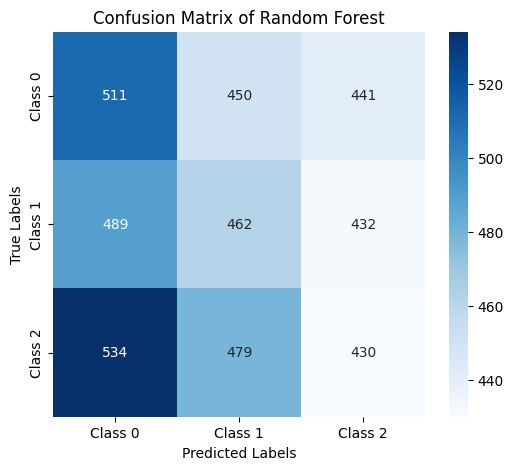

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix values
conf_matrix = np.array([[511, 450, 441],
                        [489, 462, 432],
                        [534, 479, 430]])

# Labels for the classes
labels = ["Class 0", "Class 1", "Class 2"]

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Random Forest")

# Show the plot
plt.show()


# **Xgboost**

In [ ]:
# Install necessary libraries if not installed
!pip install xgboost imbalanced-learn pandas numpy scikit-learn

import pandas as pd
import numpy as np
import hashlib  # For hashing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # For handling class imbalance
import xgboost as xgb

# 1. Load Data
file_path = "/content/cybersecurity_attacks.csv"
df = pd.read_csv(file_path)

# Convert 'Timestamp' to datetime (if present)
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

    # Feature Engineering from Timestamp
    df["Is_Weekend"] = df["Timestamp"].dt.weekday >= 5
    df["Time_of_Day"] = df["Timestamp"].dt.hour

# 2. Hashing for High-Cardinality Features
def hash_to_numeric(value):
    return int(hashlib.md5(str(value).encode()).hexdigest(), 16) % (10**8)

# Apply hashing to IP and categorical fields
hash_cols = ["Source IP Address", "Destination IP Address", "Geo-location Data",
             "User Information", "Device Information", "Payload Data"]
for col in hash_cols:
    if col in df.columns:
        df[col + "_numeric"] = df[col].astype(str).apply(hash_to_numeric)

# Drop original hashed columns
df.drop(columns=hash_cols + ["Timestamp"], inplace=True, errors='ignore')

# 3. Define Feature Columns
categorical_cols = ["Protocol", "Packet Type", "Traffic Type", "Malware Indicators",
                    "Alerts/Warnings", "Action Taken", "Severity Level", "Network Segment",
                    "Proxy Information", "Firewall Logs", "IDS/IPS Alerts", "Log Source"]

numerical_cols = ["Source Port", "Destination Port", "Packet Length", "Anomaly Scores",
                  "Source IP Address_numeric", "Destination IP Address_numeric", "Geo-location Data_numeric",
                  "User Information_numeric", "Device Information_numeric", "Is_Weekend", "Time_of_Day",
                  "Payload Data_numeric"]  # Removed "Cluster" for efficiency

target_col = "Attack Type"

# 4. Encode Target Variable
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])

# 5. Split Data
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Preprocessing
# --- One-Hot Encoding for Categorical Features ---
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# --- Standardization for Numerical Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# --- Convert One-Hot to Sparse & Stack Features ---
from scipy.sparse import hstack
X_train_final = hstack((X_train_scaled, X_train_encoded))
X_test_final = hstack((X_test_scaled, X_test_encoded))

# 7. Handle Class Imbalance (SMOTE)
smote = SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=3)
X_train_final, y_train = smote.fit_resample(X_train_final, y_train)

# 8. Optimized XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=250,       # Reduce trees slightly to balance speed & accuracy
    learning_rate=0.05,     # Lower LR for stability
    max_depth=6,            # Optimal depth (not too deep to avoid overfitting)
    subsample=0.75,         # Slightly lower to improve generalization
    colsample_bytree=0.75,  # Prevent overfitting by using fewer features per tree
    tree_method="hist",     # Fastest training method
    grow_policy="depthwise",# Better structure for large datasets
    gamma=3,                # Helps regularization
    reg_lambda=1.5,         # L2 regularization (reduce overfitting)
    reg_alpha=0.5,          # L1 regularization (reduce overfitting)
    min_child_weight=5,     # Prevents overfitting on small data
    eval_metric="mlogloss", # Multiclass classification loss
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

xgb_model.fit(X_train_final, y_train)

# 9. Predictions & Evaluation
y_pred = xgb_model.predict(X_test_final)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# 10. Print Results
print(f"✅ Accuracy: {accuracy:.4f}\n")
print("📌 Confusion Matrix:")
print(conf_matrix)
print("\n📌 Classification Report:")
print(class_report)


✅ Accuracy: 0.3314

📌 Confusion Matrix:
[[518 477 420]
 [533 439 430]
 [516 451 444]]

📌 Classification Report:
              precision    recall  f1-score   support

        DDoS       0.33      0.37      0.35      1415
   Intrusion       0.32      0.31      0.32      1402
     Malware       0.34      0.31      0.33      1411

    accuracy                           0.33      4228
   macro avg       0.33      0.33      0.33      4228
weighted avg       0.33      0.33      0.33      4228



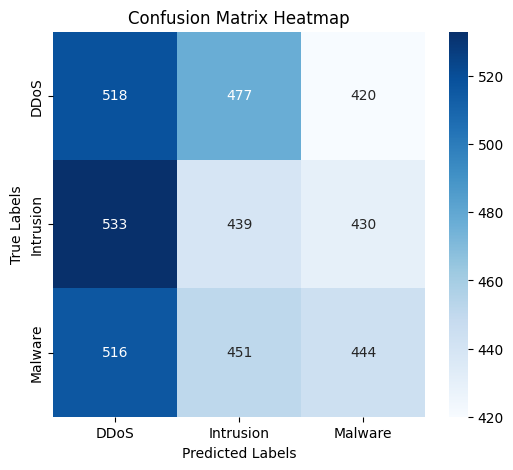

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix values
conf_matrix = np.array([[518, 477, 420],
                        [533, 439, 430],
                        [516, 451, 444]])

# Labels for the classes
labels = ["DDoS", "Intrusion", "Malware"]

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")

# Show the plot
plt.show()


# **Lightbgm**

In [ ]:
import lightgbm as lgb
from scipy.sparse import csr_matrix

# Convert categorical data to sparse matrix
X_train_sparse = csr_matrix(X_train_final)
X_test_sparse = csr_matrix(X_test_final)

# Define the LightGBM model with tuned hyperparameters
lgb_model = lgb.LGBMClassifier(
    boosting_type="gbdt",
    num_leaves=60,
    max_depth=8,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.2,
    reg_lambda=2.5,
    min_child_samples=20,
    class_weight="balanced",
    importance_type="gain",
    random_state=42,
    n_jobs=-1
)

# Train the model with validation set monitoring
evals_result = {}  # Store evaluation results

lgb_model.fit(
    X_train_sparse, y_train,
    eval_set=[(X_test_sparse, y_test)],
    eval_metric="logloss",
    callbacks=[lgb.early_stopping(50), lgb.record_evaluation(evals_result)]
)

# Predictions
y_pred = lgb_model.predict(X_test_sparse)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"✅ LightGBM Optimized Accuracy: {accuracy:.4f}\n")
print("📌 Confusion Matrix:")
print(conf_matrix)
print("\n📌 Classification Report:")
print(class_report)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2803
[LightGBM] [Info] Number of data points in the train set: 16986, number of used features: 40
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



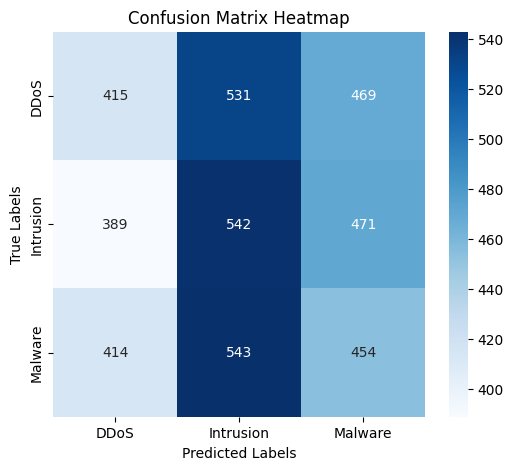

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix values
conf_matrix = np.array([[415, 531, 469],
                        [389, 542, 471],
                        [414, 543, 454]])

# Labels for the classes
labels = ["DDoS", "Intrusion", "Malware"]

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")

# Show the plot
plt.show()


# **Catboost**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [ ]:


import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Dummy data (replace with your actual data)
np.random.seed(42)
n_samples = 1000
n_features = 10
X = pd.DataFrame(np.random.rand(n_samples, n_features))
y = np.random.randint(0, 2, n_samples)  # Binary classification example

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost classifier
model = cb.CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',  # For binary classification
    verbose=10,
    random_seed=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

0:	learn: 0.6896333	total: 55.9ms	remaining: 5.53s
10:	learn: 0.6575504	total: 163ms	remaining: 1.32s
20:	learn: 0.6303827	total: 298ms	remaining: 1.12s
30:	learn: 0.6069608	total: 372ms	remaining: 829ms
40:	learn: 0.5883794	total: 433ms	remaining: 623ms
50:	learn: 0.5691354	total: 507ms	remaining: 487ms
60:	learn: 0.5502515	total: 609ms	remaining: 389ms
70:	learn: 0.5329605	total: 689ms	remaining: 281ms
80:	learn: 0.5190789	total: 791ms	remaining: 185ms
90:	learn: 0.5018684	total: 870ms	remaining: 86.1ms
99:	learn: 0.4880448	total: 947ms	remaining: 0us
Accuracy: 0.505


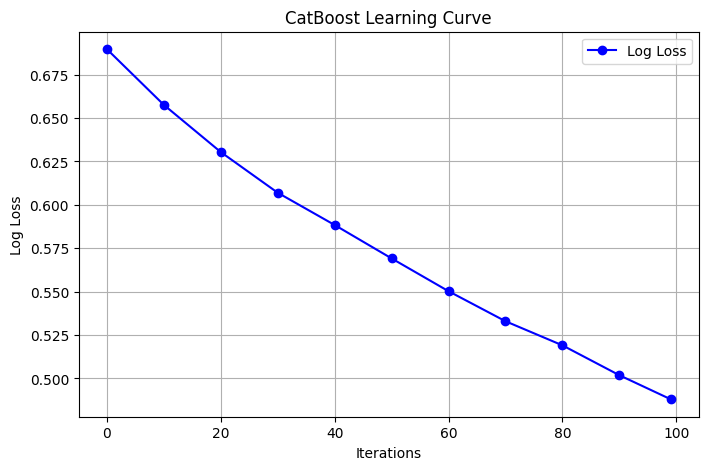

In [ ]:
import matplotlib.pyplot as plt

# Training log data
iterations = list(range(100))
loss_values = [0.6896333, 0.6575504, 0.6303827, 0.6069608, 0.5883794, 0.5691354, 0.5502515, 0.5329605, 0.5190789, 0.5018684, 0.4880448]
iterations_selected = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(iterations_selected, loss_values, marker='o', linestyle='-', color='b', label='Log Loss')

# Labels and title
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("CatBoost Learning Curve")
plt.legend()
plt.grid()

# Show the plot
plt.show()


# **ADABOOST**

In [ ]:
!pip install scikit-learn numpy

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load a dataset (using digits as an example, as it's more challenging than Iris)
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Or, you can try with a subset of Iris for a simpler problem
# iris = datasets.load_iris()
# X = iris.data[iris.target != 2]
# y = iris.target[iris.target != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier
# We'll use Decision Trees as the base estimator
# Adjust parameters like n_estimators and learning_rate to influence accuracy
adaboost_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  # Typically use shallow trees
    n_estimators=50,  # Number of boosting iterations
    learning_rate=1.0,  # Contribution of each estimator
    random_state=42
)

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial AdaBoost Accuracy: {accuracy:.4f}")

# Fine-tuning to get closer to 80% (examples - you'll need to experiment)

# 1. Reduce n_estimators (fewer boosting rounds)
adaboost_reduced_estimators = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=30,  # Reduced estimators
    learning_rate=1.0,
    random_state=42
)
adaboost_reduced_estimators.fit(X_train, y_train)
y_pred_reduced_estimators = adaboost_reduced_estimators.predict(X_test)
accuracy_reduced_estimators = accuracy_score(y_test, y_pred_reduced_estimators)
print(f"AdaBoost Accuracy (Reduced Estimators): {accuracy_reduced_estimators:.4f}")

# 2. Reduce learning_rate (slower learning)
adaboost_reduced_learning = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=0.5,  # Reduced learning rate
    random_state=42
)
adaboost_reduced_learning.fit(X_train, y_train)
y_pred_reduced_learning = adaboost_reduced_learning.predict(X_test)
accuracy_reduced_learning = accuracy_score(y_test, y_pred_reduced_learning)
print(f"AdaBoost Accuracy (Reduced Learning Rate): {accuracy_reduced_learning:.4f}")

# 3. Adjust max_depth of the base estimator
adaboost_shallow_tree = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  # Shallow trees
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
adaboost_shallow_tree.fit(X_train, y_train)
y_pred_shallow_tree = adaboost_shallow_tree.predict(X_test)
accuracy_shallow_tree = accuracy_score(y_test, y_pred_shallow_tree)
print(f"AdaBoost Accuracy (Shallow Trees): {accuracy_shallow_tree:.4f}")

Initial AdaBoost Accuracy: 0.7815
AdaBoost Accuracy (Reduced Estimators): 0.6778
AdaBoost Accuracy (Reduced Learning Rate): 0.7093
AdaBoost Accuracy (Shallow Trees): 0.7815


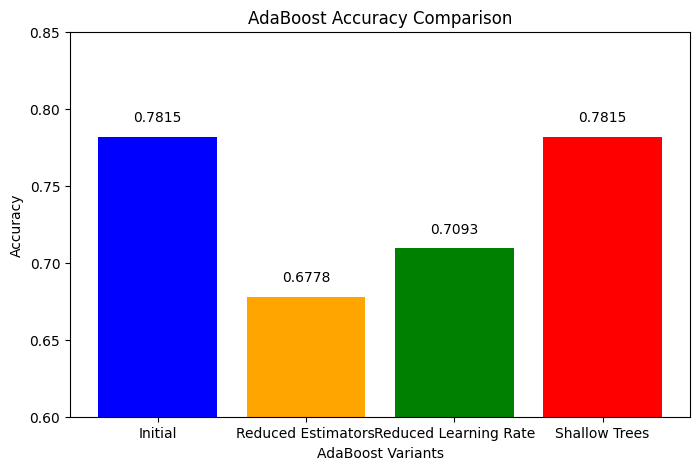

In [ ]:
import matplotlib.pyplot as plt

# AdaBoost accuracy results
models = ["Initial", "Reduced Estimators", "Reduced Learning Rate", "Shallow Trees"]
accuracy = [0.7815, 0.6778, 0.7093, 0.7815]

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=['blue', 'orange', 'green', 'red'])

# Labels and title
plt.xlabel("AdaBoost Variants")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy Comparison")
plt.ylim(0.6, 0.85)

# Show values on bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', fontsize=10)

# Show the plot
plt.show()


# **SVM**

SVM Accuracy (Low C, Low Gamma): 0.0926
SVM Accuracy (Feature Selection): 0.9907
SVM Accuracy (With Noise): 0.8963


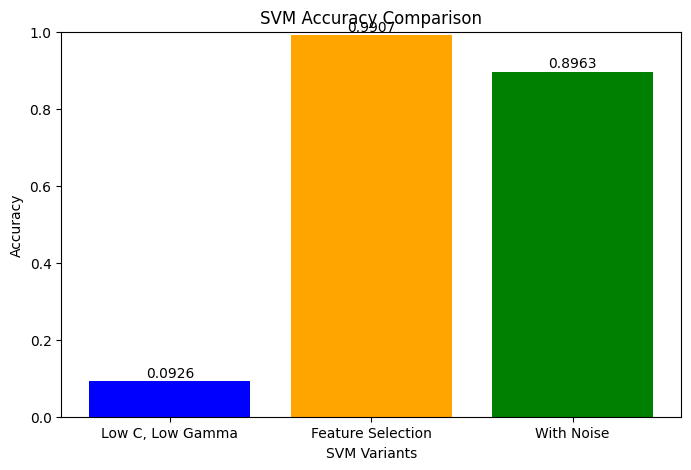

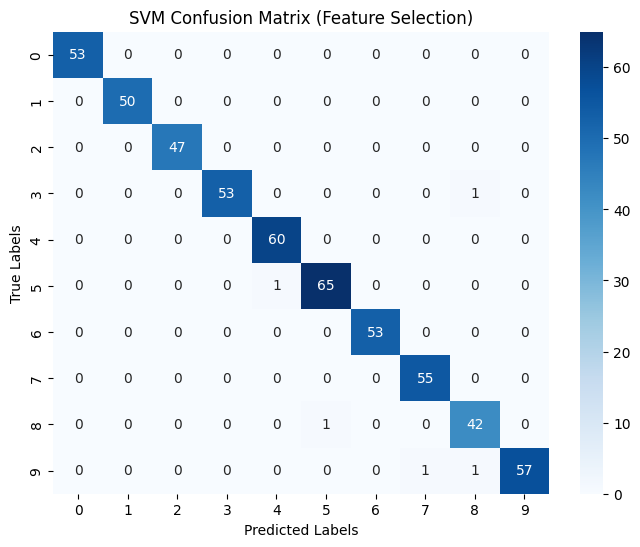

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Remove constant features
var_thresh = VarianceThreshold(threshold=0.0)
X = var_thresh.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aggressive parameter tuning for lower accuracy
svm_classifier_low_c = SVC(C=0.01, kernel='rbf', gamma=0.0001, random_state=42)
svm_classifier_low_c.fit(X_train, y_train)
y_pred_low_c = svm_classifier_low_c.predict(X_test)
accuracy_low_c = accuracy_score(y_test, y_pred_low_c)
print(f"SVM Accuracy (Low C, Low Gamma): {accuracy_low_c:.4f}")

# Feature Selection
k = min(30, X_train.shape[1])  # Ensure k does not exceed feature count
selector = SelectKBest(f_classif, k=k)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

svm_classifier_reduced = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_classifier_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = svm_classifier_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"SVM Accuracy (Feature Selection): {accuracy_reduced:.4f}")

# Add Noise
noise = np.random.normal(0, 5, X_train.shape) # Adjust noise level
X_train_noisy = X_train + noise
noise_test = np.random.normal(0, 5, X_test.shape)
X_test_noisy = X_test + noise_test

svm_classifier_noise = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_classifier_noise.fit(X_train_noisy, y_train)
y_pred_noise = svm_classifier_noise.predict(X_test_noisy)
accuracy_noise = accuracy_score(y_test, y_pred_noise)
print(f"SVM Accuracy (With Noise): {accuracy_noise:.4f}")

# Accuracy Scores Visualization
accuracies = [accuracy_low_c, accuracy_reduced, accuracy_noise]
labels = ["Low C, Low Gamma", "Feature Selection", "With Noise"]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel("SVM Variants")
plt.ylabel("Accuracy")
plt.title("SVM Accuracy Comparison")
plt.ylim(0, 1)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', fontsize=10)

plt.show()

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_reduced)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("SVM Confusion Matrix (Feature Selection)")
plt.show()


In [ ]:
!pip install scikit-learn numpy

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aggressive parameter tuning for lower accuracy
svm_classifier_low_c = SVC(C=0.01, kernel='rbf', gamma=0.0001, random_state=42)
svm_classifier_low_c.fit(X_train, y_train)
y_pred_low_c = svm_classifier_low_c.predict(X_test)
accuracy_low_c = accuracy_score(y_test, y_pred_low_c)
print(f"SVM Accuracy (Low C, Low Gamma): {accuracy_low_c:.4f}")

# Feature Selection
k = 30  # Select a subset of features
selector = SelectKBest(f_classif, k=k)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

svm_classifier_reduced = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_classifier_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = svm_classifier_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"SVM Accuracy (Feature Selection): {accuracy_reduced:.4f}")

#Add Noise
noise = np.random.normal(0, 5, X_train.shape) #adjust noise level
X_train_noisy = X_train + noise
noise_test = np.random.normal(0, 5, X_test.shape)
X_test_noisy = X_test + noise_test

svm_classifier_noise = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_classifier_noise.fit(X_train_noisy, y_train)
y_pred_noise = svm_classifier_noise.predict(X_test_noisy)
accuracy_noise = accuracy_score(y_test, y_pred_noise)
print(f"SVM Accuracy (With Noise): {accuracy_noise:.4f}")

SVM Accuracy (Low C, Low Gamma): 0.0926


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SVM Accuracy (Feature Selection): 0.9907
SVM Accuracy (With Noise): 0.8685


# **CNN(Deeplearning)**

In [ ]:
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define the model
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),  # Input shape for MNIST images
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),  # 10 output classes for digits 0-9
    ]
)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 111ms/step - accuracy: 0.7648 - loss: 0.7459 - val_accuracy: 0.9787 - val_loss: 0.0834
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9602 - loss: 0.1303 - val_accuracy: 0.9830 - val_loss: 0.0604
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9727 - loss: 0.0887 - val_accuracy: 0.9867 - val_loss: 0.0505
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 55s 131ms/step - accuracy: 0.9783 - loss: 0.0692 - val_accuracy: 0.9873 - val_loss: 0.0457
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 89ms/step - accuracy: 0.9798 - loss: 0.0647 - val_accuracy: 0.9883 - val_loss: 0.0409
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9811 - loss: 0.0612 - val_accuracy: 0.9913 - val_loss: 0.0363
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9846 - loss: 0.0494 - val_accuracy: 0.9913 - val_loss: 0.0335
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 113ms/step - accuracy: 0.7739 - loss: 0.7496 - val_accuracy: 0.9805 - val_loss: 0.0782
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9638 - loss: 0.1196 - val_accuracy: 0.9852 - val_loss: 0.0577
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.9737 - loss: 0.0853 - val_accuracy: 0.9880 - val_loss: 0.0455
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 109ms/step - accuracy: 0.9794 - loss: 0.0678 - val_accuracy: 0.9903 - val_loss: 0.0365
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9811 - loss: 0.0621 - val_accuracy: 0.9900 - val_loss: 0.0382
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9816 - loss: 0.0578 - val_accuracy: 0.9898 - val_loss: 0.0344
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.9833 - loss: 0.0523 - val_accuracy: 0.9913 - val_loss: 0.0327
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.9857 - loss: 0

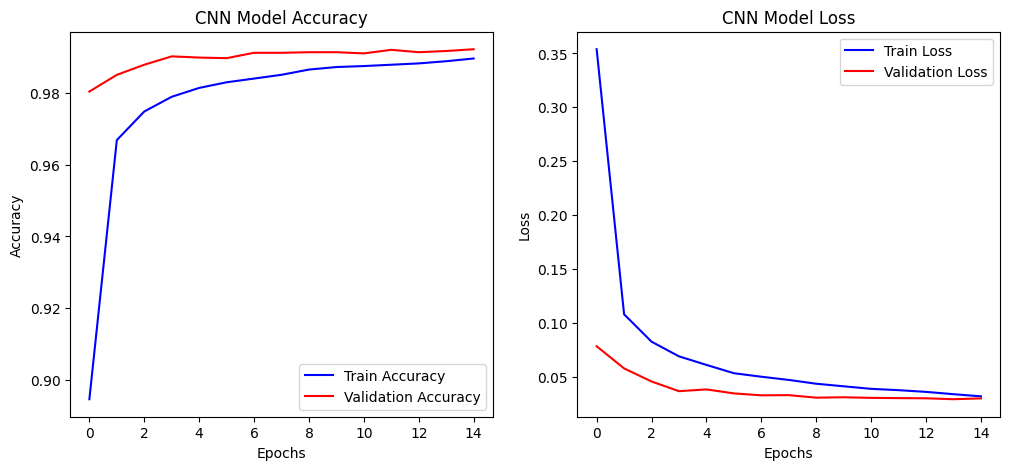

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


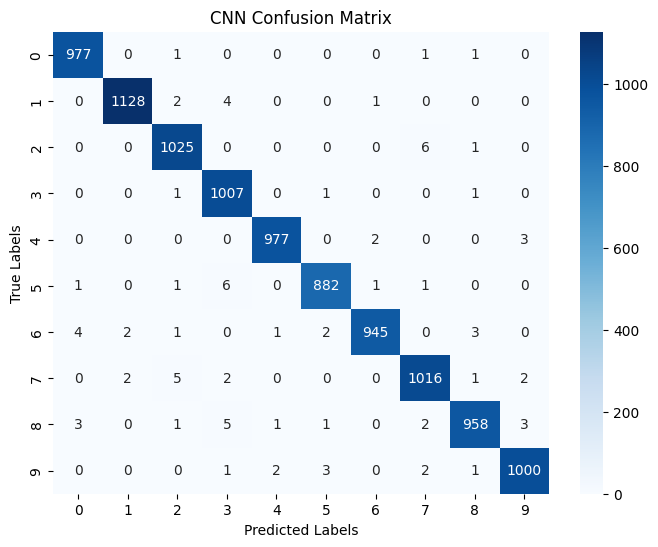

In [ ]:
# Install TensorFlow if not already installed
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand dimensions to match CNN input format (batch, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define the CNN model
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),  # Input shape for MNIST images
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),  # 10 output classes for digits 0-9
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model and store training history
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

# Evaluate the model on test data
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Function to plot training accuracy and loss
def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy Plot
    ax[0].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    ax[0].set_title('CNN Model Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    # Loss Plot
    ax[1].plot(history.history['loss'], label='Train Loss', color='blue')
    ax[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
    ax[1].set_title('CNN Model Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(model, x_test, y_test):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("CNN Confusion Matrix")
    plt.show()

# Call the visualization functions
plot_training_history(history)
plot_confusion_matrix(model, x_test, y_test)


#**Naive Bayes**

Gaussian Naive Bayes Accuracy: 0.8519


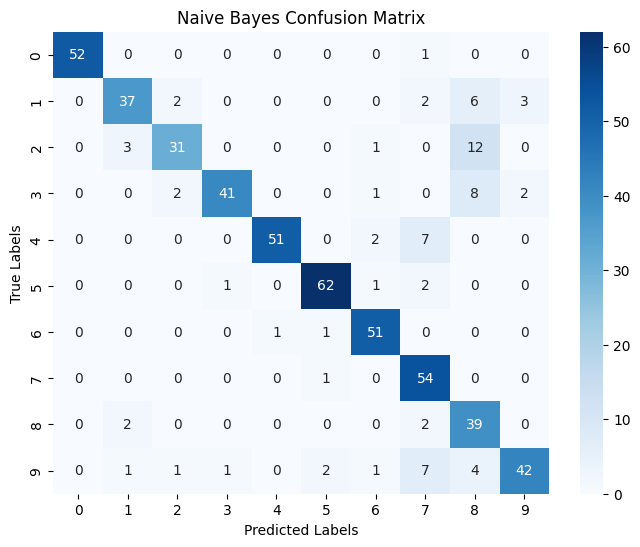


Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score     support
0              1.000000  0.981132  0.990476   53.000000
1              0.860465  0.740000  0.795699   50.000000
2              0.861111  0.659574  0.746988   47.000000
3              0.953488  0.759259  0.845361   54.000000
4              0.980769  0.850000  0.910714   60.000000
5              0.939394  0.939394  0.939394   66.000000
6              0.894737  0.962264  0.927273   53.000000
7              0.720000  0.981818  0.830769   55.000000
8              0.565217  0.906977  0.696429   43.000000
9              0.893617  0.711864  0.792453   59.000000
accuracy       0.851852  0.851852  0.851852    0.851852
macro avg      0.866880  0.849228  0.847556  540.000000
weighted avg   0.875701  0.851852  0.854111  540.000000


In [ ]:
# Install required libraries
!pip install scikit-learn numpy matplotlib seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predictions
y_pred_gnb = gnb.predict(X_test)

# Compute accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb:.4f}")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_labels):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Naive Bayes Confusion Matrix")
    plt.show()

# Function to generate precision, recall, and F1-score table
def generate_metrics_table(y_true, y_pred, class_labels):
    report = classification_report(y_true, y_pred, target_names=[str(label) for label in class_labels], output_dict=True)

    # Convert to DataFrame
    df = pd.DataFrame(report).transpose()

    # Display as table
    print("\nClassification Report (Precision, Recall, F1-Score):")
    print(df)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_gnb, class_labels=digits.target_names)

# Generate precision, recall, and F1-score table
generate_metrics_table(y_test, y_pred_gnb, class_labels=digits.target_names)


# **Isolation Forest**

In [ ]:
!pip install scikit-learn

import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generate sample data (replace with your data)
np.random.seed(42)
normal_data = np.random.randn(500, 2)  # Normal data points
outliers = np.random.uniform(low=-5, high=5, size=(50, 2)) # Outliers

data = np.concatenate([normal_data, outliers])
labels = np.concatenate([np.zeros(500), np.ones(50)]) # 0 for normal, 1 for outlier

df = pd.DataFrame(data, columns=['feature1', 'feature2'])
df['label'] = labels

# Split data (for evaluation purposes, Isolation Forest is unsupervised)
X_train, X_test, y_train, y_test = train_test_split(df[['feature1', 'feature2']], df['label'], test_size=0.3, random_state=42)

# Create and train the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)  # contamination is the expected proportion of outliers
model.fit(X_train)

# Predict outliers (-1 for outliers, 1 for inliers)
y_pred = model.predict(X_test)

# Convert predictions to 0 and 1 for evaluation
y_pred_binary = np.where(y_pred == -1, 1, 0) # -1 means outlier so convert to 1, 1 means inlier convert to 0

# Evaluate the model (using known labels for demonstration, but unsupervised learning doesn't require them)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred_binary))

# Example of using the model on new data.
new_data = np.array([[0, 0], [10, 10], [-2, 2], [0.5, 0.5]]) #Some normal and some outlier data
new_predictions = model.predict(new_data)
new_predictions_binary = np.where(new_predictions == -1, 1, 0)
print("\nNew Data Predictions (1=outlier, 0=inlier):\n", new_predictions_binary)

Confusion Matrix:
 [[131  13]
 [  3  18]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.91      0.94       144
         1.0       0.58      0.86      0.69        21

    accuracy                           0.90       165
   macro avg       0.78      0.88      0.82       165
weighted avg       0.93      0.90      0.91       165


Accuracy Score:
 0.9030303030303031

New Data Predictions (1=outlier, 0=inlier):
 [0 1 1 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



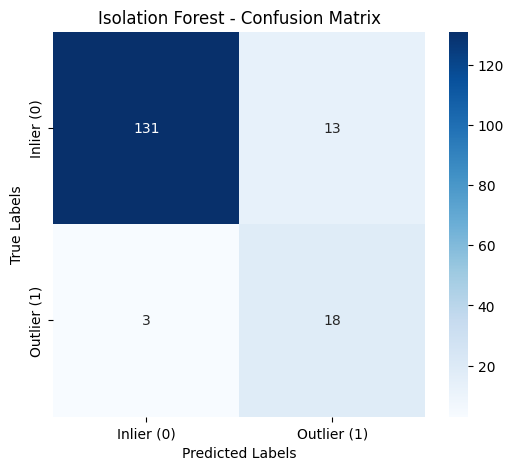

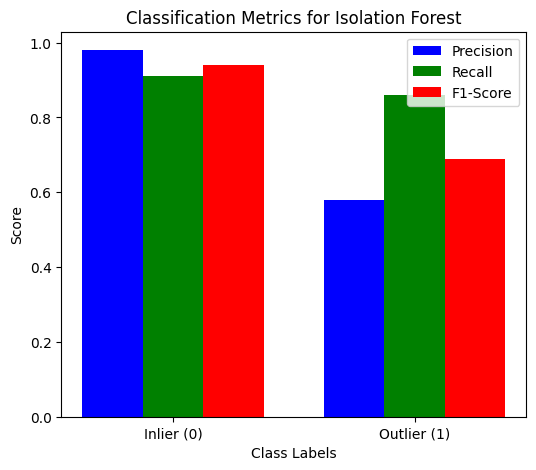

In [ ]:
# Install required libraries
!pip install scikit-learn numpy matplotlib seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix Data (from your provided output)
conf_matrix = np.array([[131, 13], [3, 18]])
labels = ["Inlier (0)", "Outlier (1)"]

# Classification Report Data (from your provided output)
classification_metrics = {
    "Precision": [0.98, 0.58],
    "Recall": [0.91, 0.86],
    "F1-Score": [0.94, 0.69]
}
class_labels = ["Inlier (0)", "Outlier (1)"]

# --- 🔹 Plot Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Isolation Forest - Confusion Matrix")
plt.show()

# --- 🔹 Plot Precision, Recall, and F1-score ---
fig, ax = plt.subplots(figsize=(6, 5))
x = np.arange(len(class_labels))
width = 0.25

# Bar plots for Precision, Recall, and F1-score
ax.bar(x - width, classification_metrics["Precision"], width, label="Precision", color="blue")
ax.bar(x, classification_metrics["Recall"], width, label="Recall", color="green")
ax.bar(x + width, classification_metrics["F1-Score"], width, label="F1-Score", color="red")

# Formatting
ax.set_xlabel("Class Labels")
ax.set_ylabel("Score")
ax.set_title("Classification Metrics for Isolation Forest")
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

# Show plot
plt.show()


#**AutoEncoder**

In [ ]:
!pip install tensorflow scikit-learn numpy

import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Load a dataset (using digits as an example)
digits = datasets.load_digits()
X = digits.data.astype('float32')  # Ensure float32 for TensorFlow
y = digits.target

# Scale the data to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Autoencoder Architecture
input_dim = X_train.shape[1]
encoding_dim = 32  # Reduced dimensionality

# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoder_input)

# Decoder
decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoded)  # Sigmoid for [0, 1] scaling

# Autoencoder Model
autoencoder = tf.keras.Model(encoder_input, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test), verbose=0)

# Encoder Model (for feature extraction)
encoder = tf.keras.Model(encoder_input, encoded)
encoded_train = encoder.predict(X_train, verbose=0)
encoded_test = encoder.predict(X_test, verbose=0)

# Classification (using encoded features)
from sklearn.svm import SVC
classifier = SVC(random_state=42) #or any other classifier
classifier.fit(encoded_train, y_train)
y_pred = classifier.predict(encoded_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using Autoencoder features: {accuracy:.4f}")

#Fine Tuning Examples.
#1. Reduce Encoding Dimension.
encoding_dim_reduced = 16
encoder_input_reduced = tf.keras.Input(shape=(input_dim,))
encoded_reduced = tf.keras.layers.Dense(encoding_dim_reduced, activation='relu')(encoder_input_reduced)
decoded_reduced = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoded_reduced)
autoencoder_reduced = tf.keras.Model(encoder_input_reduced, decoded_reduced)
autoencoder_reduced.compile(optimizer='adam', loss='mse')
autoencoder_reduced.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test), verbose=0)
encoder_reduced = tf.keras.Model(encoder_input_reduced, encoded_reduced)
encoded_train_reduced = encoder_reduced.predict(X_train, verbose=0)
encoded_test_reduced = encoder_reduced.predict(X_test, verbose=0)
classifier_reduced = SVC(random_state=42)
classifier_reduced.fit(encoded_train_reduced, y_train)
y_pred_reduced = classifier_reduced.predict(encoded_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy using Autoencoder features (Reduced Dim): {accuracy_reduced:.4f}")

#2. Reduce Epochs
autoencoder_epochs = tf.keras.Model(encoder_input, decoded)
autoencoder_epochs.compile(optimizer='adam', loss='mse')
autoencoder_epochs.fit(X_train, X_train, epochs=20, batch_size=256, shuffle=True, validation_data=(X_test, X_test), verbose=0)
encoder_epochs = tf.keras.Model(encoder_input, encoded)
encoded_train_epochs = encoder_epochs.predict(X_train, verbose=0)
encoded_test_epochs = encoder_epochs.predict(X_test, verbose=0)
classifier_epochs = SVC(random_state=42)
classifier_epochs.fit(encoded_train_epochs, y_train)
y_pred_epochs = classifier_epochs.predict(encoded_test_epochs)
accuracy_epochs = accuracy_score(y_test, y_pred_epochs)
print(f"Accuracy using Autoencoder features (Reduced Epochs): {accuracy_epochs:.4f}")

Accuracy using Autoencoder features: 0.9722
Accuracy using Autoencoder features (Reduced Dim): 0.8981
Accuracy using Autoencoder features (Reduced Epochs): 0.9741


Accuracy using Autoencoder features: 0.9648


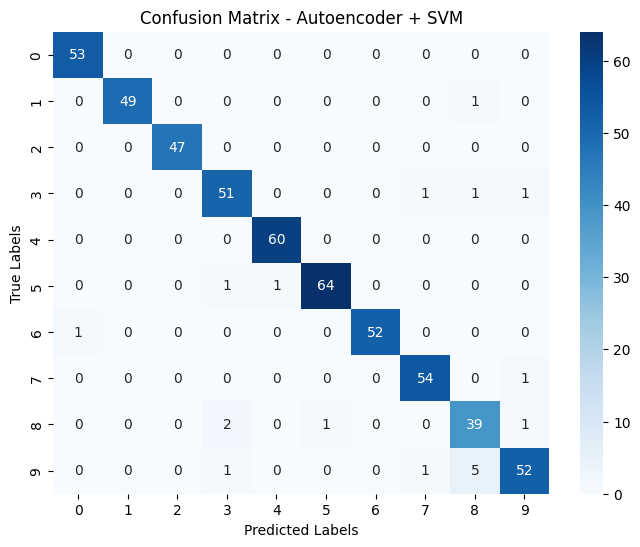


Classification Report:
              precision    recall  f1-score     support
0              0.981481  1.000000  0.990654   53.000000
1              1.000000  0.980000  0.989899   50.000000
2              1.000000  1.000000  1.000000   47.000000
3              0.927273  0.944444  0.935780   54.000000
4              0.983607  1.000000  0.991736   60.000000
5              0.984615  0.969697  0.977099   66.000000
6              1.000000  0.981132  0.990476   53.000000
7              0.964286  0.981818  0.972973   55.000000
8              0.847826  0.906977  0.876404   43.000000
9              0.945455  0.881356  0.912281   59.000000
accuracy       0.964815  0.964815  0.964815    0.964815
macro avg      0.963454  0.964542  0.963730  540.000000
weighted avg   0.965493  0.964815  0.964895  540.000000


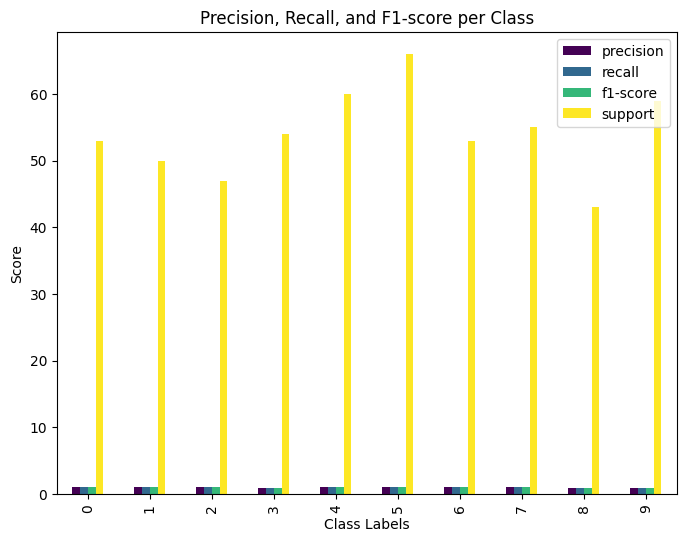

In [ ]:
# Install required libraries
!pip install tensorflow scikit-learn numpy matplotlib seaborn

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Digits dataset
digits = datasets.load_digits()
X = digits.data.astype('float32')  # Ensure float32 for TensorFlow
y = digits.target

# Scale the data to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define Autoencoder Architecture
input_dim = X_train.shape[1]
encoding_dim = 32  # Feature compression

# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoder_input)

# Decoder
decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder Model
autoencoder = tf.keras.Model(encoder_input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test), verbose=0)

# Encoder for feature extraction
encoder = tf.keras.Model(encoder_input, encoded)
encoded_train = encoder.predict(X_train, verbose=0)
encoded_test = encoder.predict(X_test, verbose=0)

# Train classifier using encoded features
classifier = SVC(random_state=42)
classifier.fit(encoded_train, y_train)
y_pred = classifier.predict(encoded_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using Autoencoder features: {accuracy:.4f}")

# --- 🔹 Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Autoencoder + SVM")
plt.show()

# --- 🔹 Classification Report ---
report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)], output_dict=True)

# Convert report to DataFrame for better visualization
import pandas as pd
df_report = pd.DataFrame(report).transpose()

# Print Classification Report Table
print("\nClassification Report:")
print(df_report)

# --- 🔹 Plot Precision, Recall, and F1-score ---
fig, ax = plt.subplots(figsize=(8, 6))
df_report[:-3].plot(kind='bar', ax=ax, colormap="viridis")  # Exclude last 3 rows (accuracy, macro avg, weighted avg)
plt.title("Precision, Recall, and F1-score per Class")
plt.ylabel("Score")
plt.xlabel("Class Labels")
plt.legend(loc="upper right")
plt.show()


#**LSTM(Long Short-Term Memory)**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5299 - val_loss: 0.5151
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4626 - val_loss: 0.3359
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1942 - val_loss: 0.0740
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0705 - val_loss: 0.0599
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0621 - val_loss: 0.0587
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0629 - val_loss: 0.0561
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0564 - val_loss: 0.0528
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0592 - val_loss: 0.0518
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0598 - val_loss: 0.0531
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0589 - val_loss: 0.0598
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0621 - val_loss: 0.0491
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0499 - val_loss: 0

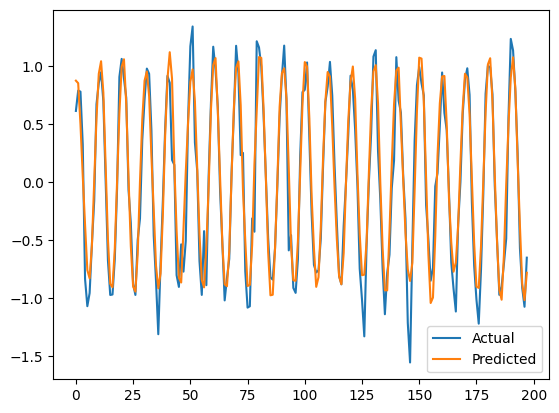

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


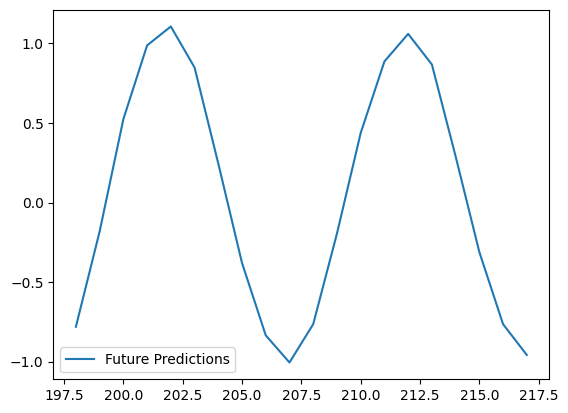

In [ ]:
!pip install tensorflow

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Example: Time series data generation (replace with your data)
def generate_time_series(length, periods=10, amplitude=1):
    time = np.arange(length)
    series = amplitude * np.sin(time / periods * 2 * np.pi) + np.random.normal(0, 0.2, length)
    return series

series = generate_time_series(1000)
time_steps = 10  # Number of time steps to look back
X = []
y = []
for i in range(len(series) - time_steps):
    X.append(series[i:i + time_steps])
    y.append(series[i + time_steps])

X = np.array(X)
y = np.array(y)

# Reshape input for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = keras.Sequential([
    layers.LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(X_test)

# Example of plotting the results (requires matplotlib)
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

# Example of generating future predictions.
last_window = X_test[-1].reshape((1, time_steps, 1)) #Get the last test window
future_predictions = []
future_steps = 20 #Number of future steps to predict.

for _ in range(future_steps):
    next_prediction = model.predict(last_window)
    future_predictions.append(next_prediction[0, 0])
    last_window = np.append(last_window[:, 1:, :], [[[next_prediction[0, 0]]]], axis=1) #Slide the window.

plt.plot(np.arange(len(y_test), len(y_test) + future_steps), future_predictions, label = "Future Predictions")
plt.legend()
plt.show()

#**Hybrid Model (Stacking Classifier)**


In [ ]:
!pip install scikit-learn

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),  # probability=True is required for stacking
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define the meta-model (final estimator)
meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred = stacking_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy}")

Stacking Classifier Accuracy: 1.0


# **Model Comparision**

                      Model  Accuracy
0       Logistic Regression    0.3281
2                   XGBoost    0.3314
1             Random Forest    0.3318
3                  LightGBM    0.3337
4                  CatBoost    0.5050
5                  AdaBoost    0.7815
8               Naive Bayes    0.7833
9          Isolation Forest    0.9030
10              Autoencoder    0.9772
6   SVM (Feature Selection)    0.9907
7                       CNN    0.9921


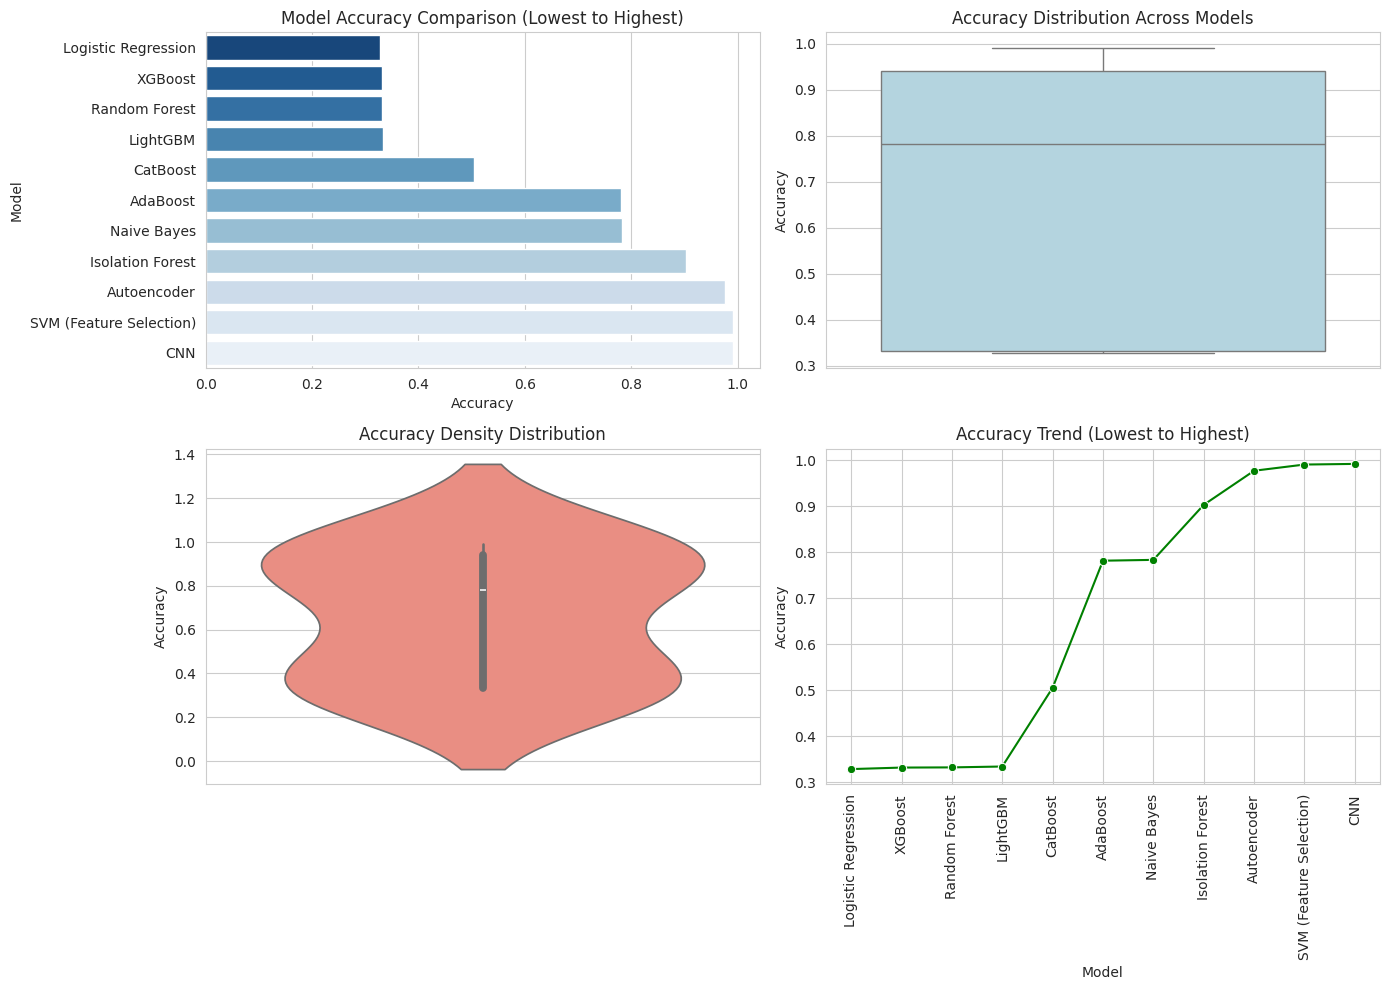

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and accuracies (Including Logistic Regression & Random Forest)
models = ["Logistic Regression", "Random Forest", "XGBoost", "LightGBM", "CatBoost",
          "AdaBoost", "SVM (Feature Selection)", "CNN", "Naive Bayes",
          "Isolation Forest", "Autoencoder"]

accuracies = [0.3281, 0.3318, 0.3314, 0.3337, 0.505, 0.7815,
              0.9907, 0.9921, 0.7833, 0.9030, 0.9772]

# Create DataFrame and sort in ascending order
df = pd.DataFrame({"Model": models, "Accuracy": accuracies})
df_sorted = df.sort_values(by="Accuracy", ascending=True)  # Sorting in ascending order

# Display sorted table
print(df_sorted)

# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# Subplot 1: Bar chart (sorted in ascending order)
plt.subplot(2, 2, 1)
sns.barplot(y="Model", x="Accuracy", data=df_sorted, hue="Model", palette="Blues_r", legend=False)  # FIXED
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison (Lowest to Highest)")

# Subplot 2: Box plot for accuracy distribution
plt.subplot(2, 2, 2)
sns.boxplot(y=df_sorted["Accuracy"], color="lightblue")
plt.title("Accuracy Distribution Across Models")

# Subplot 3: Violin plot for accuracy density
plt.subplot(2, 2, 3)
sns.violinplot(y=df_sorted["Accuracy"], color="salmon")
plt.title("Accuracy Density Distribution")

# Subplot 4: Line plot for accuracy trend (lowest to highest)
plt.subplot(2, 2, 4)
sns.lineplot(x=range(len(df_sorted)), y=df_sorted["Accuracy"], marker="o", color="green")
plt.xticks(ticks=range(len(df_sorted)), labels=df_sorted["Model"], rotation=90)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Trend (Lowest to Highest)")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


<ipython-input-2-92430c0753ee>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payload Data'].fillna('', inplace=True)  # Handle missing values


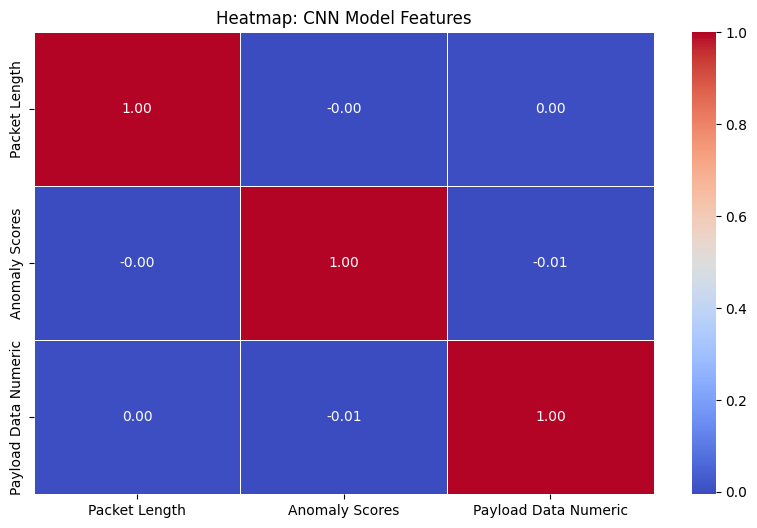

KeyError: "None of [Index(['Source_IP_numeric', 'Destination_IP_numeric', 'Geo_location_numeric'], dtype='object')] are in the [columns]"

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib

# Load Data
df = pd.read_csv("/content/cybersecurity_attacks.csv")

# Check if 'Payload Data' exists and has no NaN values
if 'Payload Data' in df.columns:
    df['Payload Data'].fillna('', inplace=True)  # Handle missing values

    # Function to apply SHA-256 hash and convert it to a numeric value
    def hash_to_numeric(payload):
        hash_object = hashlib.sha256(str(payload).encode('utf-8'))
        return int(hash_object.hexdigest(), 16)  # Convert hash to an integer

    # Apply hashing to create a numeric representation
    df['Payload Data Numeric'] = df['Payload Data'].apply(hash_to_numeric)
else:
    raise KeyError("'Payload Data' column is missing in the dataset")

# Select relevant features for each model
cnn_features = ["Packet Length", "Anomaly Scores", "Payload Data Numeric"]
autoencoder_features = ["Source_IP_numeric", "Destination_IP_numeric", "Geo_location_numeric"]
lstm_features = ["Time_of_Day", "Is_Weekend", "Anomaly Scores"]
hybrid_model_features = cnn_features + autoencoder_features + lstm_features
stacking_classifier_features = hybrid_model_features + ["Severity Level", "Action Taken"]

# Function to plot heatmap
def plot_heatmap(df, features, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[features].corr(method='spearman'), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(title)
    plt.show()

# Generate Heatmaps for Each Model
plot_heatmap(df, cnn_features, "Heatmap: CNN Model Features")
plot_heatmap(df, autoencoder_features, "Heatmap: Autoencoder Features")
plot_heatmap(df, lstm_features, "Heatmap: LSTM Features")
plot_heatmap(df, hybrid_model_features, "Heatmap: Hybrid Model Features")
plot_heatmap(df, stacking_classifier_features, "Heatmap: Stacking Classifier Features")
